# Adopt, Don't Shop:
## An Analysis of Animal Shelter Outcomes Before vs During COVID-19 Related Lockdowns in California


## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Curiosity regarding how the fate of animals in shelters changed as a result of the onset of COVID-19 lockdown was investigated in this project. The following analysis first takes an in-depth look at how many factors may have influenced the outcomes of these animals desparate for homes. Later, through designation of positive, neutral, and negative outcomes of pets within these shelters, it was determined whether outcomes of these animals *seemed* to change for the better or worse. Finally, our questions were answered through hypothesis testing to determine whether outcome types of animals in shelters changed significantly during lockdown, and whether positive outcomes significantly increased during lockdown.

# Names

- Alec Panattoni
- Tyler Tran
- Sophia Lui
- Rodolfo Cardenas

# Research Question

*Is there a relationship between the adoption outcomes for shelter animals in California and the onset
(and continuation) of COVID-19 related lockdowns beginning in March 4th, 2020 and onwards?*

## Background & Prior Work

#### Introduction and Research

This project was inspired by our collective love for our pets, and because one of the team members had adopted a dog during lockdown. 

With the onset of the COVID-19 pandemic and the associated national lockdowns and quarantines came the prevailing idea among our friends: pets would be key in combating the lonliness and isolation. For many, that might mean a trip to an animal shelter, where secluded individuals could find animal companions equally in need of affection.

In fact, public opinion supported our theory, with widespread news reports of increased public interest in adopting or fostering shelter animals, but these were not corroborated by peer reviewed evidence.[<sup>1</sup>](#fn1)

Still, we remained hopeful that we would find some positive impact that COVID may have had on shelter animals. Assuming that increased public interest would translate into an increase in animal shelter visits, we expect an increase in positive outcomes (such as adoption) for shelter animals. In fact, a study showed that the relative search volume (RSV) on Google for pets, dogs, and cats was significantly higher (P = 0.001) during April and May 2020 (early in the pandemic) when compared to the 5-year worldwide averages. Similarly, comparing the same period of time to the previous year (2019) also showed an increase in search interest.[<sup>2</sup>](#fn2) However, a preliminary study surveying anonymized animal shelters in the Northeastern United States found that the proportion of animals who were adopted or euthanized between 2019 and 2020 showed little difference, but did show wide variation in outcomes for different shelters.[<sup>1</sup>](#fn1).

The number of animals (cats and dogs) entering shelters was appropriately lower during lockdown when compared to months from the previous year (2019), which was reflected in the lower adoption and euthanization counts.[<sup>1</sup>](#fn1). Given the isolative nature associated with the long lockdown periods it seemed plausible that less Americans were willing to relinquish their pets to shelters, which we see as a positive outcome overall. Yet, with COVID safety protocols beginning to relax combined with the pandemic's impact on individual financial stability, we might expect a higher abandonment rate for newly adopted shelter animals, which in turn would impact the compartive overall adoption rates between pre and during-COVID. Such an outcome is both stressful for the owner and the shelter animal [<sup>3</sup>](#fn3). Although the animal's temperment is often cited as a common reason for returns, we believe that lockdown may have had a disproportionate impact on the return rates for dogs when compared to cats. Given that lockdown suggests an abundance of indoor activities and since cats are usually better acclimated to smaller indoor environments, they may have been more resilient to lockdown-related logistical issues that would potentially cause a return. RSV for cats and dogs reflects this as the relative search volume for dog adoptions has been decreasing since July 2020, while interest in cat adoption sustained its heighted popularity[<sup>2</sup>](#fn2). However, it is unclear if interest in cat adoption mirrors actual adoption rates.

#### Motivating Our Hypothesis

Although these documented reseaerch findings differed with our collective assumptions of lockdown's impact on shelter animal outcomes, many of these studies were focused on shelters in the East Coast. More importantly, they noted the wide variance in impact that COVID had for different shelters, indicating that their findings may not generalize to the country as a whole. Therefore, we are seeking to assess the validity of our theories on COVID's impact within our home state of California specifically. To do so, we seek to analyze animal shelter data from shelters within California to get a sense of trends within the state or at least a sub-section of the state.

References (include links):

<span id="fn1"> - 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8468430/ </span>

<span id="fn2"> - 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8145284/ </span>

<span id="fn3"> - 3) https://www.nature.com/articles/s41598-021-87649-2 </span>

# Hypothesis

We hypothesize that there will be a general difference in outcomes for animals in California shelters over the course of the state's lockdown in comparison to outcome trends before March 4th, 2020. Furthermore, given the isolative environment created by the post-COVID world, we theorize that percentage of positive outcomes will see an increase.

# Dataset(s)

- Dataset Name: "Animal Shelter Intake and Outcome"
- Link to the dataset: https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw
- Number of observations: 20,176

The provided link contains over 20, 000 accounts of animals taken in by shelters in Sonoma County, California. It is managed and publicly provided by the government of Sonoma County, and includes many features that may be relevant to our research question. These are Intake Date, Outcome Date, and Outcome Type (how the animal left the shelter). Other helpful columns include Type (specifying Cat/Dog/Other), Sex, Intake Type (method of arrival to the shelter), and Outcome/Intake Condition.

The remaining columns are: Name, Color, Size, Date of Birth, Impound Number, Kennel Number, Animal ID, Days in Shelter, Intake Subtype, Outcome Subtype, Intake Jurisdiction, Outcome Jurisdiction, Outcome Zip Code, and Location (coordinates of outcome location). It is worth noting that this dataset is constantly updated with new cases of animal intake/outcomes, meaning our analysis can be re-performed at a later date to view time-specific trends. In order to keep our analysis consistent, we will only be using the dataset as updated on October 21st, 2021. 

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re

sns.set_theme()

# utility python script written to perform analysis
import util

As our research question only pertains to cats and dogs, we'll only be studying the data for those two shelter animal species. 

In [2]:
shelter_data = pd.read_csv("sonoma_county_shelter_data.csv")
shelter_data = shelter_data[shelter_data["Type"].isin(["CAT", "DOG"])]
shelter_data.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,4/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,7/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,8/4/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,1/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


# Data Cleaning

In [3]:
shelter_data.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count'],
      dtype='object')

### Removing Data Not Relevant to Our Analysis

As our research question is only concerned with cats and dog's let's make sure that the dataset only contains information for species that we're tracking.

Other columns present may not be necessary for analysis:

1. Animal ID: Potentially identifying information for the animal's owner when they get adopted, and is more problematic than animal name as its more unique (and owners often rename their cats and dogs after adoption)

2. Location: This seems to be the physical longitude and latitude of the shelter. For similar privacy concerns, we elect to remove this column as the less revealing *Outcome Zip Code* displays similar information

3. Count is an extra column added for users of the dataset to do easier groupby operations for working with programs such as Tableau. It is unecessary for analysis.

4. Impound Number is also unique to the animal and not necessary for analysis

In [4]:
shelter_data = shelter_data.drop(
    columns=["Animal ID", "Location", "Count", "Impound Number"]
    )

In [5]:
shelter_data["Type"].value_counts()

DOG    12347
CAT     7829
Name: Type, dtype: int64

### Ensuring Each Column Only Tracks One Variable

Some of the columns in the dataset seem to track multiple variables. For example, the *Name* column tracks both the animal's name and whether or not the animal was given their name by the shelter. Similarly, the *Sex* column tracks both the sex of the animal and whether or not they were neutered/spayed. Both of these columns have a secondary variable within them that could be re-written into their own individual columns.

#### Fixing the "Sex" Column

To fix this column, we'll be creating a separate indicator for whether or not the shelter animal was neutered or spayed.

In [6]:
sex = shelter_data["Sex"]
protected = (sex.mask(sex.isin(["Neutered", "Spayed"]), True)).where(sex.isin(["Neutered", "Spayed"]), False)
shelter_data.insert(5, "Neutered or Spayed", protected)

In [7]:
shelter_data["Neutered or Spayed"].value_counts()

True     13328
False     6848
Name: Neutered or Spayed, dtype: int64

After creating a separate column to track if the animal was neutered or spayed, we can mask the data in the original column so that it tracks a single variable.

In [8]:
shelter_data["Sex"] = sex.mask(sex == "Neutered", "Male").mask(sex == "Spayed", "Female")

In [9]:
shelter_data["Sex"].value_counts()

Male       10333
Female      8546
Unknown     1297
Name: Sex, dtype: int64

#### Fixing the "Name" Column

A boolean column will be used to denote if the animal was named by the shelter.

In [10]:
shelter_data.insert(1, 'Named by Shelter', shelter_data['Name'].astype(str).str.contains("\*"))
shelter_data["Name"] = shelter_data["Name"].str.replace("*", "", regex = True)

In [11]:
shelter_data.head()

,Name,Named by Shelter,Type,Breed,Color,Sex,Neutered or Spayed,Size,Date Of Birth,Kennel Number,...,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code
0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,4/11/2014,DS69,...,3,STRAY,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0
1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,7/24/2020,DA30,...,49,STRAY,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,8/4/2019,CA02,...,38,STRAY,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,10/27/2020,CA03,...,6,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0
4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,1/16/2018,CS05,...,20,STRAY,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0


### Checking if Column Values Need Standarization

Although this data is relatively clean (as its maintained by a government organization), checking to see if there are discrepancies in some of the categorical columns such as *Color* and *Size* is necessary. 

Without knowing precisely how the data is generated, there may be instances where "BRN" and "BROWN" are both used for example.

The Sonoma County website also indicates that *Size* is measured as "LARGE", "MEDIUM", "SMALL", or "TOY" presumably by weight. Upon first glance, the dataset also has the value "KITTN". A further look at the column is required to see if it needs standardization.

#### Standardizing Colors

Evidently there is an enormous variety in colors, and some standardization to be done. Specifically Instances of common abbreviations will be replaced with the full word. Examples of this would be:

1. BL --> BLUE
2. BRN or BR --> BROWN
3. BLK --> BLACK
4. CHOC --> CHOCOLATE
5. SLVR or SL --> SILVER
6. ORG --> ORANGE
7. CRM --> CREAM

In [12]:
def standardize_color(ser: pd.Series) -> pd.Series:
    # replacing instances of Blue
    output = ser.str.replace(r"BL\s|BL$", "BLUE ", regex=True)
    # replacing instances of Brown
    output = output.str.replace(r"BRN\s|BRN$", "BROWN ", regex=True)
    output = output.str.replace(r"BR\s|BR$", "BROWN ", regex=True)
    # replacing instances of Chocolate
    output = output.str.replace(r"CHOC\s|CHOC$", "CHOCOLATE ", regex=True)
    # replacing instances of Black
    output = output.str.replace(r"BLK\s|BLK$", "BLACK ", regex=True)
    # replacing instances of Silver
    output = output.str.replace(r"SLVR\s|SLVR$", "SILVER ", regex=True)
    output = output.str.replace(r"SL\s|SL$", "SILVER ", regex=True)
    # Replacing instances of Orange
    output = output.str.replace(r"ORG\s|ORG$", "ORANGE ", regex=True)
    # Replacing instances of Cream
    output = output.str.replace(r"CRM\s|CRM$", "CREAM ", regex=True)

    return output.str.strip()

In [13]:
shelter_data["Color"] = standardize_color(shelter_data["Color"])

As an eye test to see if the standardization was successful,, we'll simply look at the colors remaining in the dataset.

In [14]:
shelter_data["Color"].unique()

array(['BLACK/WHITE', 'TAN', 'GRAY', 'SEAL PT', 'BROWN TABBY', 'BLACK',
       'BLUE/WHITE', 'YELLOW', 'WHITE', 'ORANGE/WHITE', 'RED',
       'BROWN BRINDLE', 'WHITE/TAN', 'BLACK/BROWN BRINDLE', 'WHITE/BROWN',
       'BROWN/WHITE', 'BROWN TABBY/WHITE', 'YELLOW/WHITE', 'TAN/BROWN',
       'TRICOLOR', 'BLACK TABBY', 'BLACK/TAN', 'TAN/WHITE',
       'SEAL PT/WHITE', 'BLACK/BROWN', 'GRAY/WHITE', 'BROWN', 'TAN/BLACK',
       'TORTIE', 'TAN/GRAY', 'GRAY/BLACK', 'WHITE/BLUE', 'FLAME PT',
       'BROWN BRINDLE/WHITE', 'BROWN/BLACK', 'WHITE/BLACK', 'BROWN/TAN',
       'RED/WHITE', 'GOLD', 'LYNX PT', 'BLUE', 'AGOUTI', 'FAWN',
       'ORANGE TABBY', 'CREAM', 'BLUE BRINDLE', 'GRAY TABBY/WHITE',
       'TAN/BLUE', 'RED/TAN', 'UNKNOWN', 'BLUE PT', 'CHOCOLATE/WHITE',
       'WHITE/GRAY', 'APRICOT/WHITE', 'GRAY TABBY', 'WHITE/BROWN TABBY',
       'BLUE MERLE/BLACK', 'CHOCOLATE/TAN', 'FAWN/WHITE', 'BUFF/WHITE',
       'BLUE PT/WHITE', 'BROWN TABBY/BLACK', 'BLUE MERLE', 'BROWN MERLE',
       'FAWN/BLACK

#### Standardizing Size

Although the Sonoma County website doesn't indiciate that "KITTN" and "PUPPY" are categories for size, it seems to indicate that these shelter animals are still growing and can therefore not be placed into a size classification because of the potential for rapid growth based on their age or breed. 

Therefore, no standardization seems to be necessary for this column even though it does not exactly match the website's description.

In [15]:
shelter_data["Size"].value_counts()

SMALL    7120
MED      3789
LARGE    3694
KITTN    3533
TOY      1060
PUPPY     768
X-LRG     179
Name: Size, dtype: int64

### Changing Data Formats For Analysis

As we're interested in comparing pre-and-during/post COVID adoption outcomes, we'll need our date-like columns to actually be represented in date formats for analysis. Therefore all of those columns will be converted appopropriately.

In [16]:
shelter_data["Date Of Birth"] = pd.to_datetime(shelter_data["Date Of Birth"])
shelter_data["Intake Date"] = pd.to_datetime(shelter_data["Intake Date"])
shelter_data["Outcome Date"] = pd.to_datetime(shelter_data["Outcome Date"])

### Adding Animal Age

Using the date of birth and today's date we can reasonably figure out the age of an animal, which may be a determining factor in adoption outcome. Since age is a likely a more important feature than date of birth, we'll be using age instead of date of birth in our analysis.

In [17]:
today = pd.to_datetime("now")
shelter_data["Age"] = ((today - shelter_data["Date Of Birth"]).dt.days  / 365).round()

shelter_data = shelter_data.drop("Date Of Birth", axis=1)

#### A Note on Zip Codes

Although Zip Codes aren't typically float values, they are represented in this dataset as floats due to missing values.

### Adding Variables of Interest

On March 4th, 2020 Governor Gavin Newsom declared a state of emergency in California to help slow the spread of COVID-19. Accordingly, our analysis will consider this date as the "start" of COVID-related lockdowns. As we are interested in finding the potential relationship between lockdowns and adoption outcomes, we will denote whether or not the animal's adoption outcome was after March 4th or not using a boolean column. 

https://www.gov.ca.gov/2020/03/04/governor-newsom-declares-state-of-emergency-to-help-state-prepare-for-broader-spread-of-covid-19/

In [18]:
shelter_data = shelter_data.assign(
    **{"Outcome After COVID": shelter_data.loc[:,'Outcome Date'].ge(pd.to_datetime('March 4, 2020'))})

### Final Cleaned Dataset

At this point we have all the variables of interest and have ensured that all our data is "tidy". Further pre-processing for analysis will occur in the next section, which details examination of missingness and imputation (if deemed appropriate).

In [19]:
shelter_data.head()

,Name,Named by Shelter,Type,Breed,Color,Sex,Neutered or Spayed,Size,Kennel Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Age,Outcome After COVID
0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,DS69,2021-09-08,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,8.0,True
1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,DA30,2021-07-24,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,1.0,True
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,CA02,2021-08-04,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,2.0,True
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,CA03,2021-01-30,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,1.0,True
4,MERLIN,True,CAT,DOMESTIC SH,BROWN TABBY,Male,True,SMALL,CS05,2021-01-16,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,4.0,True


# Data Missingness Analysis

Before performing analysis on present data, it may be helpful to analysis the missingness of data. This could give us a different angle to understand relationships within the data. Moreover, doing missingness analysis may show us if any subgroups we expect to find are over or under-represented within our dataset. For example, there may be more dogs than cats. Stray shelter animals may also be missing crucial information we expect to influence their adoption outcome.

By conducting analysis on missingness, we can also determine if imputation would be appropriate for the data in other to complete our understanding of a feature's impact on adoption outcome. 

### Understanding Missingness

In [20]:
shelter_data.shape

(20176, 23)

In [21]:
shelter_data.isna().sum()

Name                    4452
Named by Shelter           0
Type                       0
Breed                      0
Color                      0
Sex                        0
Neutered or Spayed         0
Size                      33
Kennel Number             15
Intake Date                0
Outcome Date             139
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             140
Outcome Subtype          337
Intake Condition           0
Outcome Condition        360
Intake Jurisdiction        0
Outcome Jurisdiction    2632
Outcome Zip Code        2688
Age                     4155
Outcome After COVID        0
dtype: int64

Immediately we see that there are several columns with large amounts of missingness. We also see that these columns often have similar numbers of missingness. 

For example, *Name* and *Age* (which was created using *Date of Birth*) have similar missingness. We can speculate that this might be more likely based on either *Type* (dog or cat) or even based on *Intake Type*.  We may expect that strays without identifying information (such as a collar) may be more likely to be missing these features. These possibilities will be examined later in the missingness analysis.

It is also evident that *Outcome Jurisdiction* and *Outcome Zip Code* have similar levels of missingness. This could be due to overlaps in their definition. 

### Overall Missingness

Let's take a better look at the missingness relative to the total amount of data we have. 

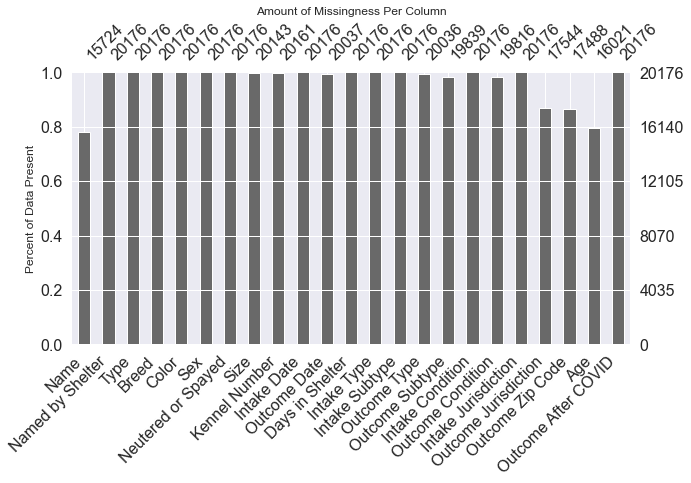

In [22]:
ax = msno.bar(shelter_data, figsize=(10, 5))
ax.set(title="Amount of Missingness Per Column", ylabel="Percent of Data Present")
plt.show()

From the barplot we can better quantify the percentage of missing data for each column. Notably, the columns with the most missing data still have just under 80% of their data intact, equating about ~20% missingness. 

To get a better sense of how the missingness of one column impacts another column, we let's visualize the relationships between missing data in one column, and missing data in another.

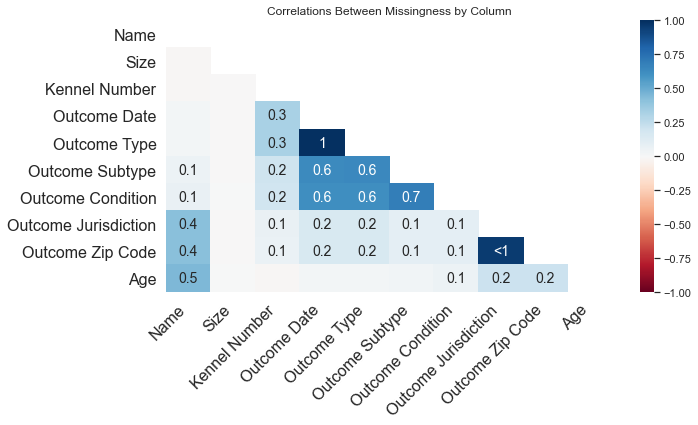

In [23]:
ax = msno.heatmap(shelter_data, figsize=(10, 5))
ax.set(title="Correlations Between Missingness by Column")
plt.show()

There seem to be some mild to strong relationships for missingness. Missing an animal's name for example, has a 0.5 correlation with missing that animal's age. 

As expected, missing *Outcome Date* has strong ties to missing *Outcome Subtype* and *Outcome Condition*. Similarly, missing *Outcome Zip Code* has nearly a 1.0 correlation with missing *Outcome Jurisdiction*.

Background knowledge can help give us insight into these relationships. Animals still in the shelter, for example, would be missing their outcome information as they have yet to see an outcome.

Still, some of these relationships remain unclear. Let's now take a look at the missingness for cats and dogs separately.

### Missingness by Shelter Animal Type

In [24]:
cats = shelter_data[shelter_data["Type"] == "CAT"]
cats.shape[0], cats.shape[0] / shelter_data.shape[0]

(7829, 0.38803528945281524)

In [25]:
dogs = shelter_data[shelter_data["Type"] == "DOG"]
dogs.shape[0], dogs.shape[0] / shelter_data.shape[0]

(12347, 0.6119647105471848)

Our dataset contains more information for dogs (61% of the dataset) than it does for cats (39% of the dataset). Given that dogs make up a much larger portion of the data, we might also expect that they would make up a larger proportion of the missing data.

In [26]:
cats.isna().sum() / shelter_data.isna().sum()

Name                    0.730009
Named by Shelter             NaN
Type                         NaN
Breed                        NaN
Color                        NaN
Sex                          NaN
Neutered or Spayed           NaN
Size                    0.060606
Kennel Number           0.466667
Intake Date                  NaN
Outcome Date            0.338129
Days in Shelter              NaN
Intake Type                  NaN
Intake Subtype               NaN
Outcome Type            0.342857
Outcome Subtype         0.409496
Intake Condition             NaN
Outcome Condition       0.463889
Intake Jurisdiction          NaN
Outcome Jurisdiction    0.554331
Outcome Zip Code        0.543155
Age                     0.503971
Outcome After COVID          NaN
dtype: float64

In [27]:
dogs.isna().sum() / shelter_data.isna().sum()

Name                    0.269991
Named by Shelter             NaN
Type                         NaN
Breed                        NaN
Color                        NaN
Sex                          NaN
Neutered or Spayed           NaN
Size                    0.939394
Kennel Number           0.533333
Intake Date                  NaN
Outcome Date            0.661871
Days in Shelter              NaN
Intake Type                  NaN
Intake Subtype               NaN
Outcome Type            0.657143
Outcome Subtype         0.590504
Intake Condition             NaN
Outcome Condition       0.536111
Intake Jurisdiction          NaN
Outcome Jurisdiction    0.445669
Outcome Zip Code        0.456845
Age                     0.496029
Outcome After COVID          NaN
dtype: float64

Immediately we can see some interesting details. Notably, despite representing less than half of the dataset, cats account for 73% of missing *Name*. *Date of Birth / Age*, *Outcome Jurisdiction* and *Outcome Zip Code* also have particularly high percentages of missingness. This suggests that cats are more likely to be missing data overall, given that they are less represented in the dataset but often account for over 50% of the missingness of a feature.

On the other hand, dogs account for a larger portion of missingness in *Size*, *Outcome Date* and *Outcome Type*. As dogs make up roughly 60% of the data, having roughly 60% of the missingness in *Outcome Date* and *Outcome Type* is within expectation. However, it is unclear why dogs are much more likely to be missing their size/weight classification.

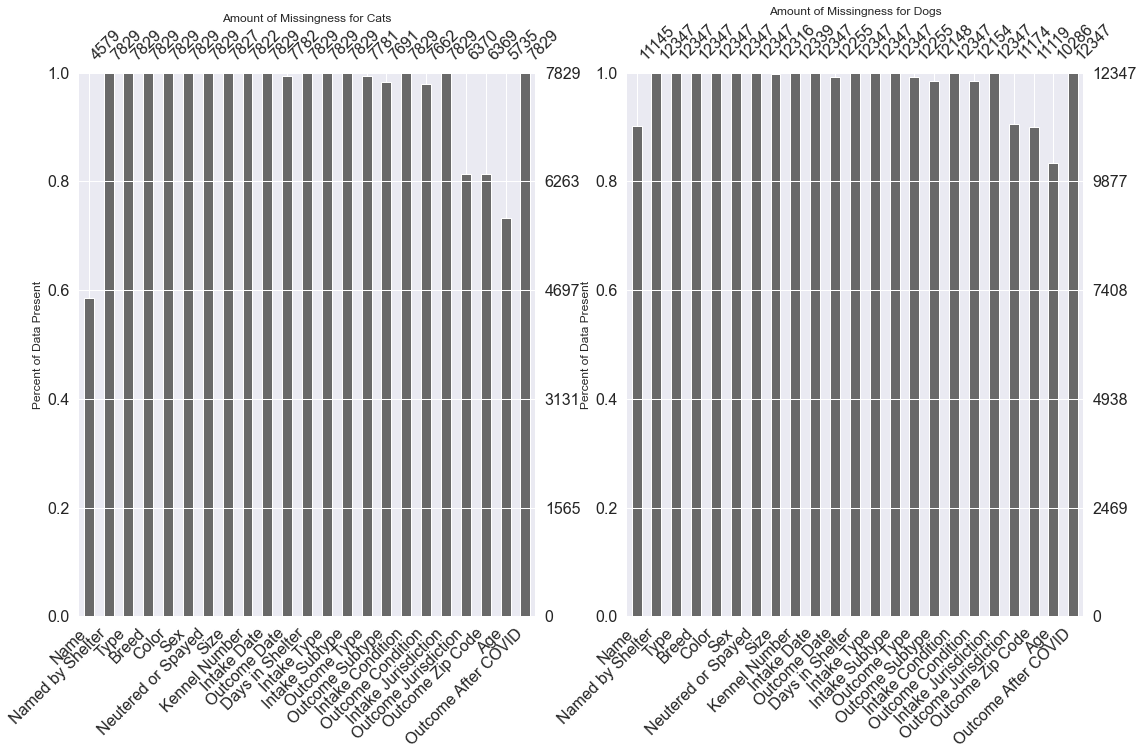

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(18,10))
msno.bar(cats, ax = ax1)
msno.bar(dogs, ax = ax2)
ax1.set(title="Amount of Missingness for Cats", ylabel="Percent of Data Present")
ax2.set(title="Amount of Missingness for Dogs", ylabel="Percent of Data Present")
plt.show()

Roughly 40% of cats are missing *Name*, and other columns with missing data see ranges of 20-30% missingness.

Dogs, however, seem to have a lower percent of missing data across all columns, with the greatest disparity compared to cats being the missingness of *Name*.

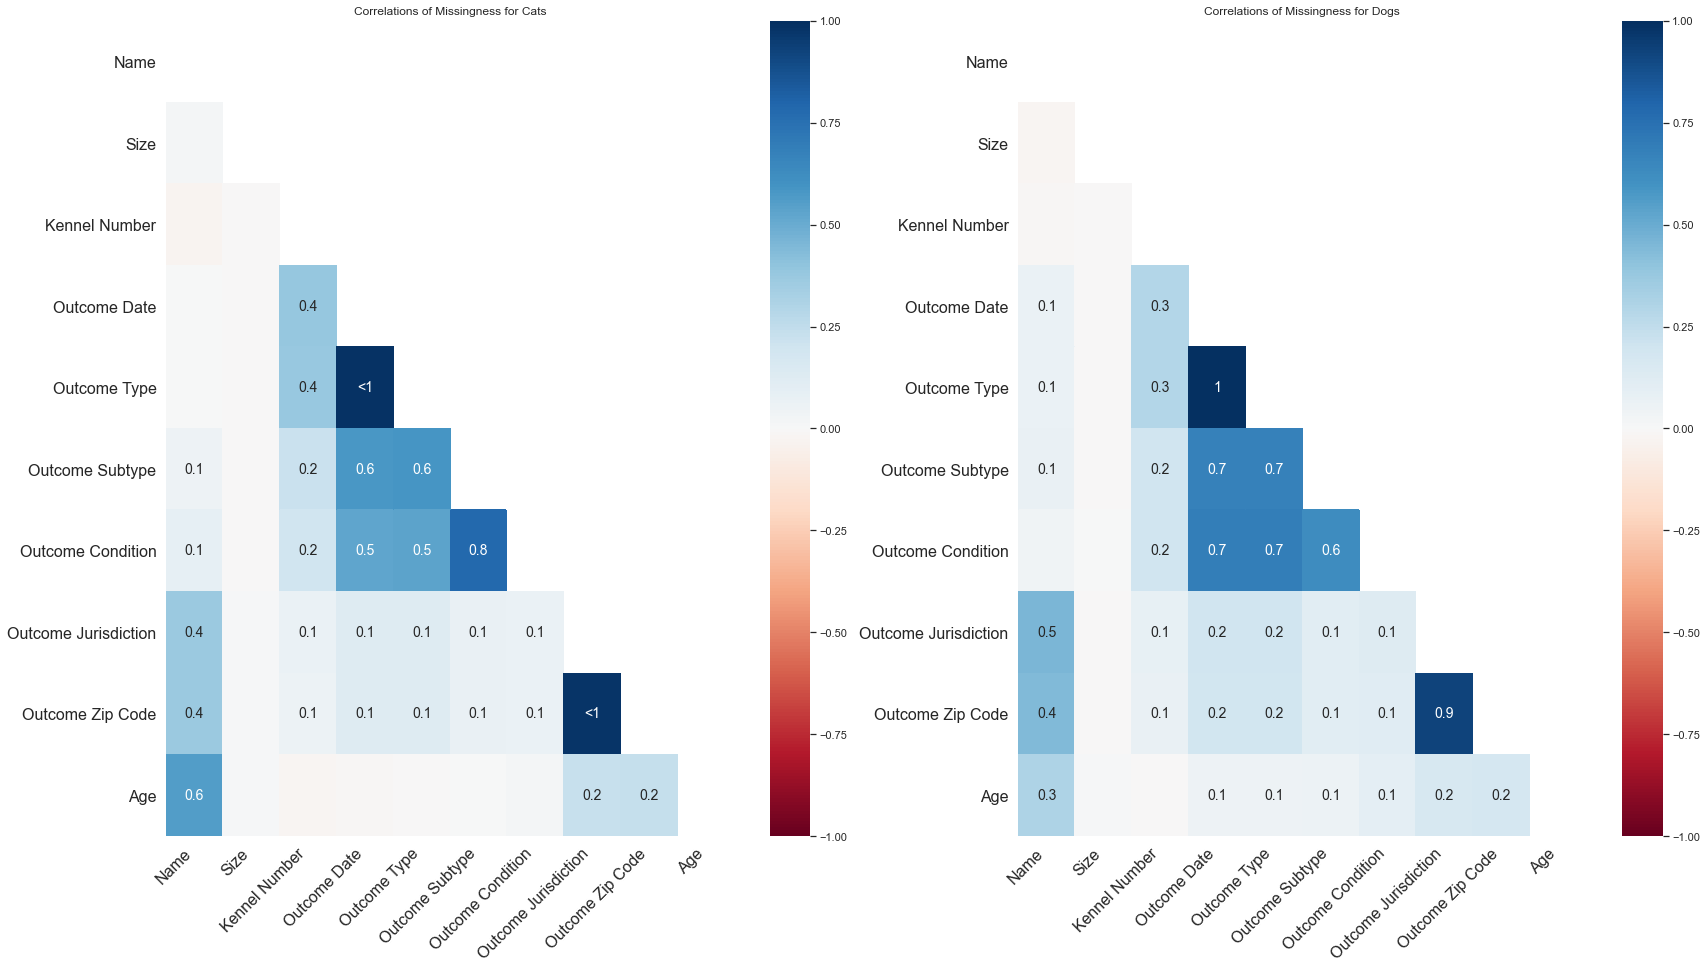

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(28,15))
msno.heatmap(cats, ax = ax1)
msno.heatmap(dogs, ax = ax2)
ax1.set(title="Correlations of Missingness for Cats")
ax2.set(title="Correlations of Missingness for Dogs")
plt.show()

The differences in missingness between cats and dogs is reflected in the dependency of missingness between columns. Notably, the missingness of *Date of Birth / Age* correlating with missing *Name* is drastically higher for cats versus dogs.

Overall, the discrepancies based on animal species was more varied than expected, specifically within identifying features like an animal's name. It is unclear why this may be based on species alone, which suggests that another variable may be responsible for the difference in missingness. Intuatively, one such variable may be the *Intake Type*, or how/why the animal arrived at the shelter. Lack of a collar or other identifying information may be dependent on how the animal arrived. Furthermore, it is possible that the distribution of intake types between these two species may differ greatly enough to explain these discrepancies should we find that a certain intake type is more likely to be missing its information.

### Missingness Based On Intake Type

In [30]:
shelter_data["Intake Type"].value_counts() / shelter_data.shape[0]

STRAY              0.732008
OWNER SURRENDER    0.133822
CONFISCATE         0.070579
QUARANTINE         0.021412
TRANSFER           0.020817
ADOPTION RETURN    0.017546
OS APPT            0.003816
Name: Intake Type, dtype: float64

In [31]:
strays = shelter_data[shelter_data["Intake Type"] == "STRAY"]
strays.isna().sum() / shelter_data.isna().sum()

Name                    0.908805
Named by Shelter             NaN
Type                         NaN
Breed                        NaN
Color                        NaN
Sex                          NaN
Neutered or Spayed           NaN
Size                    0.757576
Kennel Number           0.666667
Intake Date                  NaN
Outcome Date            0.748201
Days in Shelter              NaN
Intake Type                  NaN
Intake Subtype               NaN
Outcome Type            0.742857
Outcome Subtype         0.777448
Intake Condition             NaN
Outcome Condition       0.813889
Intake Jurisdiction          NaN
Outcome Jurisdiction    0.747720
Outcome Zip Code        0.739583
Age                     0.831769
Outcome After COVID          NaN
dtype: float64

The majority of animals that arrive in Sonoma County shelters seem to be strays, making up roughly 73% of shelter animal intake. Accordingly, we see that this intake category makes up the majority of the missingness in the dataset. If missing data were not correlated with *Intake Type*, we would expect roughly the same percent missingness as we have percent data. 

Notably, we see that stray animals account for over 90% of missing *Name* and over 83% of missing *Age*.

In [32]:
(strays.isna().sum() / strays.shape[0]).sort_values(ascending=False).head()

Name                    0.273952
Age                     0.234004
Outcome Zip Code        0.134606
Outcome Jurisdiction    0.133252
Outcome Condition       0.019839
dtype: float64

In [33]:
cats["Intake Type"].value_counts() / cats.shape[0]

STRAY              0.741091
OWNER SURRENDER    0.183165
CONFISCATE         0.023886
TRANSFER           0.020565
ADOPTION RETURN    0.013028
QUARANTINE         0.011879
OS APPT            0.006387
Name: Intake Type, dtype: float64

In [34]:
dogs["Intake Type"].value_counts() / dogs.shape[0]

STRAY              0.726249
OWNER SURRENDER    0.102535
CONFISCATE         0.100186
QUARANTINE         0.027456
TRANSFER           0.020977
ADOPTION RETURN    0.020410
OS APPT            0.002187
Name: Intake Type, dtype: float64

#### Takeaway

The majority of shelter animals in Sonoma County are strays, followed by owner-surrendered animals. More importantly, strays account for the majority of missingness in other columns. Identifying features such as *Name* and *Date of Birth* are unknown for over 25% of the strays in the dataset, and make up a greater proportion of missingness than their proportion of data would suggest. Other features with missingness, such as *Outcome Zip Code* show that strays have missingness percentages that mirror their share of the overall data.

Although missing identifying information seems to be correlated with being a stray, only about 23% of strays are missing their age. As age may be a predictive factor in whether or not a family chooses to adopt an animal (or if the animal) is fit for adoption, we will probabilistically impute age.

### Imputing Age Probabilistically

Using the distribution of ages present in our data, we can probabilistically impute the missing ages. This allows us to deal with inherent bias in our data. For example, stray animals may typically have a different age than animals surrendered by their owners. Performing analysis of age's impact on adoption outcome would therefore be influenced by this bias. By probabilistically imputing missing age, we can get an unbiased estimation of the mean and variance of age.

As found earlier, it seems as though missingness of age is dependent on intake type. Formal testing, with a p-value threshold of 0.05, will be done to confirm these suspicions.

Furthermore, we'll be doing imputation based on animal type as dogs and cats have different lifespans.

#### Permutation Testing to See if Missing Age is Dependent on Intake Type

$H_0$: Missing age is not dependent on intake type.

$H_A$: Missing age is likely dependent on intake type.

In [35]:
ageisnull = shelter_data.assign(isnull = shelter_data["Age"].isnull())

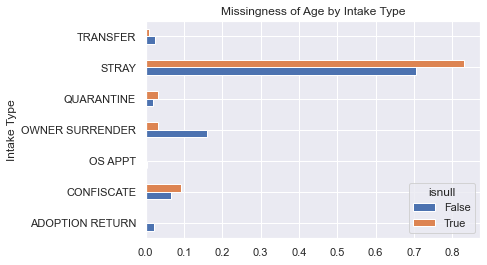

In [36]:
age_missing_by_type = (
    ageisnull
    .pivot_table(columns="isnull", index="Intake Type", values=None, aggfunc="size")
    .fillna(0)
    .apply(lambda x: x/x.sum()))
ax = age_missing_by_type.plot(kind="barh")
ax.set(title="Missingness of Age by Intake Type")
plt.show()

In [37]:
test_stats, obs = util.permutation_test(ageisnull, "Intake Type", "isnull", util.tvd)

In [38]:
util.calc_pvalue(test_stats, obs)

0.0

With a p-value of 0, there is insufficient evidence that missing age is not dependent on intake type, and in order to accurately fill in missing values, imputation should be done for each intake type independently.

#### Permutation Testing to See if Missing Age is Dependent on Type

$H_0$: Missing age is not dependent on type.

$H_A$: Missing age is likely dependent on type.

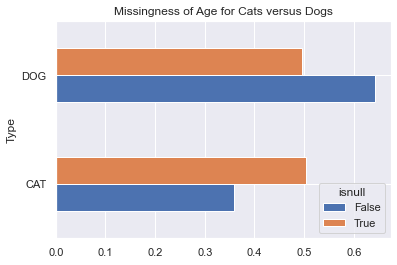

In [39]:
age_missing_by_animal = (
    ageisnull
    .pivot_table(columns="isnull", index="Type", values=None, aggfunc="size")
    .fillna(0)
    .apply(lambda x: x/x.sum()))
ax = age_missing_by_animal.plot(kind="barh")
ax.set(title="Missingness of Age for Cats versus Dogs")
plt.show()

In [40]:
test_stats, obs = util.permutation_test(ageisnull, "Type", "isnull", util.tvd)

In [41]:
util.calc_pvalue(test_stats, obs)

0.0

With a p-value of 0, there is insufficient evidence that missing age is not dependent on animal type, and in order to accurately fill in missing values, imputation should be done for each animal type independently.

#### Performing Imputation

To remain consistent based on intake type and animal type, we'll probabilistically impute based on the distribution of ages found within shelter animals of an intake type and species combination (for example Stray Cats, or Owner-Surrendered Dogs). From there we will generate an empirical distribution of ages for that combination based on existing data and probabilistically choose a number from that distribution. The likelihood of choosing an age from a bin within the distribution will be dependent on the bins proportion within the histogram. Within each bin, every age is equally likely to occur. 

To put it more simply, we'll be probabilistically choosing an age based on species, intake combination and choosing an age at random based on existing data. By putting the data in a distribution we ensure that common ages are not overly imputed. Instead we probabilistically choose an range of ages based on observed data and select from the chosen range at uniform random.

In [42]:
intake_types = shelter_data["Intake Type"].unique()
breeds = shelter_data["Type"].value_counts().index

In [43]:
for breed in breeds:
    for intake in intake_types:
        missings = shelter_data[(shelter_data["Intake Type"] == intake) & (
            shelter_data["Type"] == breed)]["Age"]
        fill_values = util.impute_portion(missings)
        shelter_data["Age"].update(fill_values)

In [44]:
shelter_data["Age"].isnull().sum()

0

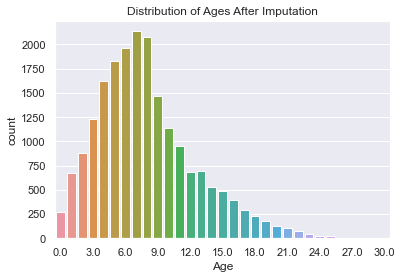

In [45]:
ax = sns.countplot(x=shelter_data["Age"])
ax.set(title="Distribution of Ages After Imputation")
ax.set_xticks(range(0, len(shelter_data["Age"].unique()),3))
plt.show()

We can see that there are now no missing *Age* values, and that our imputation was successful. We'll redefine our separate dataframes for cats and dogs with their imputed ages.

In [46]:
cats = shelter_data[shelter_data["Type"] == "CAT"]
dogs = shelter_data[shelter_data["Type"] == "DOG"]

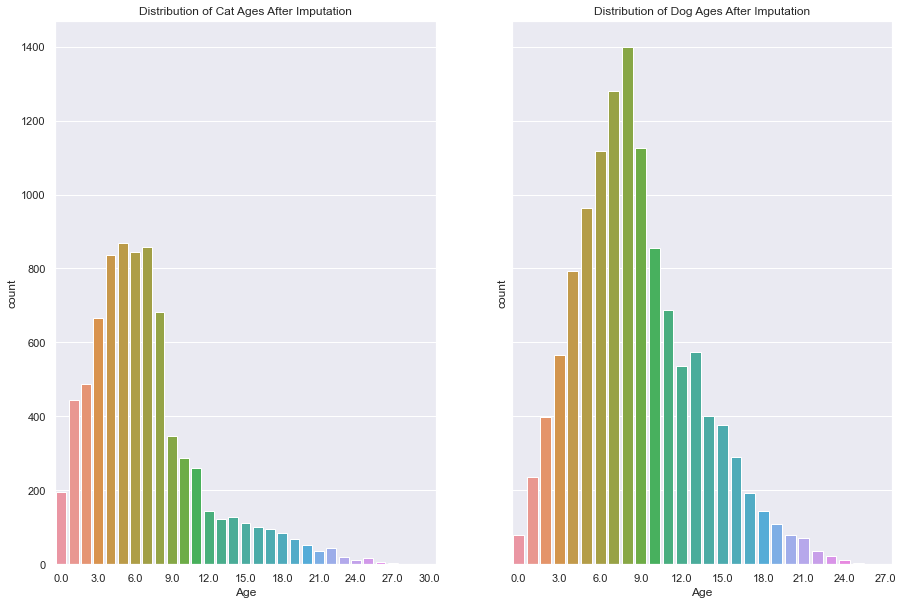

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,10))
sns.countplot(x=cats["Age"], ax = ax1)
ax1.set(title="Distribution of Cat Ages After Imputation")
ax1.set_xticks(range(0, len(cats["Age"].unique()),3))

sns.countplot(x=dogs["Age"], ax = ax2)
ax2.set(title="Distribution of Dog Ages After Imputation")
ax2.set_xticks(range(0, len(dogs["Age"].unique()),3))
plt.show()

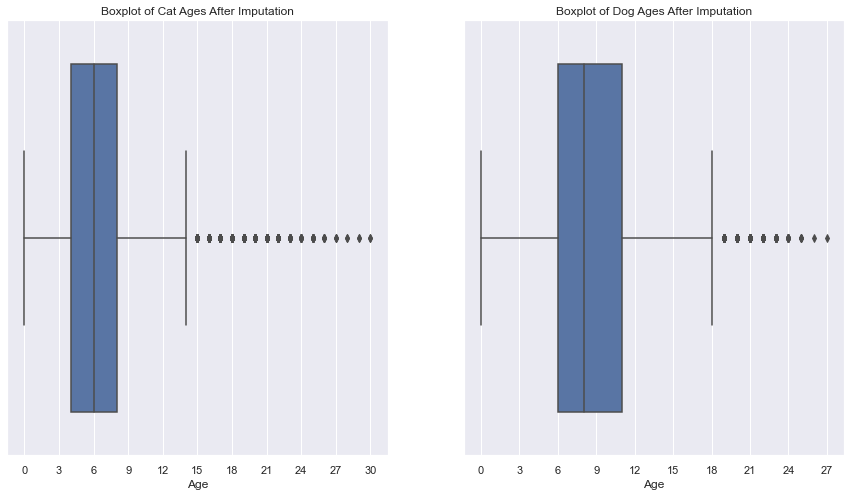

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(15,8))
sns.boxplot(x=cats["Age"], ax = ax1)
ax1.set(title="Boxplot of Cat Ages After Imputation")
ax1.set_xticks(range(0, len(cats["Age"].unique()),3))

sns.boxplot(x=dogs["Age"], ax = ax2)
ax2.set(title="Boxplot of Dog Ages After Imputation")
ax2.set_xticks(range(0, len(dogs["Age"].unique()),3))
plt.show()

# Data Analysis & Results

In continuing our exploration of Sonoma County animal shelter outcomes, let's remind ourselves of the data we have available to us. 

Note that in future analysis, lockdown or "post-COVID" is defined as any date after March 4th, 2020, which was previously described as the date that Governor Newsom declared a "state of emergency" in California.

In [48]:
shelter_data.shape

(20176, 23)

In [49]:
shelter_data['Type'].value_counts()

DOG    12347
CAT     7829
Name: Type, dtype: int64

In [50]:
shelter_data.columns

Index(['Name', 'Named by Shelter', 'Type', 'Breed', 'Color', 'Sex',
       'Neutered or Spayed', 'Size', 'Kennel Number', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Age', 'Outcome After COVID'],
      dtype='object')

In [51]:
shelter_data.head()

,Name,Named by Shelter,Type,Breed,Color,Sex,Neutered or Spayed,Size,Kennel Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Age,Outcome After COVID
0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,DS69,2021-09-08,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,8.0,True
1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,DA30,2021-07-24,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,1.0,True
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,CA02,2021-08-04,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,2.0,True
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,CA03,2021-01-30,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,1.0,True
4,MERLIN,True,CAT,DOMESTIC SH,BROWN TABBY,Male,True,SMALL,CS05,2021-01-16,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,4.0,True


### Outcome Types for Dogs and Cats
We've classified the outcome types as positive, neutral, and negative. By doing so, we can analyze if there are any differences before and after the start of lockdown due to COVID-19 in California. 

##### Positive Outcomes:

1. Adoption - 
With hopes that the owner will provide the animal with a better life than the animal would have had being         stuck in the shelter
2. Return to Owner - 
Either a lost animal was taken into the shelter and was returned to their owner, or an owner took an animal into the shelter and later had a change of heart. To put it simply, unless it is a "bad" owner, this is a positive outcome, Unfortunately, there is no indicator for the reason behind the return.

##### Neutral Outcomes:

1. Transfer - 
Transferred to another shelter; generally this is a neutral outcome since the animal is still stuck in a       shelter. Can also be considered positive or negative depending on if the shelter has better/worse conditions. To generalize, we will consider this a neutral outcome.
2. RTOS (Return to Original/Other Shelter) -
Same explanation as "Transfer"

3. APPT -
The dataset/website had not noted what this outcome type meant. Since we're not sure what this could be, we will consider it a neutral outcome.

##### Negative Outcomes:

1. Euthanize -
Animal had been put down.

2. Escaped/Stolen -
The animal is on its own without food, water, and shelter. The animal is at risk of getting hit by a car, eaten by a coyote, starving, etc. There is a chance that the animal gets taken in by a new owner, and has a better life than it would in the shelter. However, given the risks described and the fact that the animal would be safer in the shelter, we'll consider this a negative outcome.

3. Disposal -
The animal passed away in the shelter and was disposed of.

4. Died -
The animal passed away in the shelter.

### Visualizing Overall Trends

Text(0.5, 1.0, 'Outcome Types for Dogs and Cats')

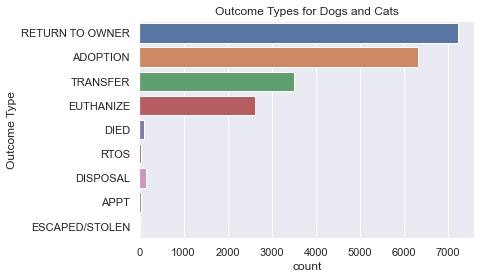

In [52]:
# Count plot to view the ranking of outcome types from the most to least
sns.countplot(y=shelter_data["Outcome Type"]).set_title("Outcome Types for Dogs and Cats")

Within Sonoma County, the majority of outcomes are clustered within the top four categories. Although *Return to Owner* and *Adoption*, both positive outcomes, represent the majority of outcomes, the number of *Euthanizations* is also high, at over 2000 euthanizations (over 10% of animals). 

#### Outcomes for Dogs and Cats Separately

In [84]:
cat_outcomes = cats["Outcome Type"].value_counts(normalize=True)
cat_outcomes

ADOPTION           0.426937
TRANSFER           0.234674
EUTHANIZE          0.170287
RETURN TO OWNER    0.137257
DISPOSAL           0.015936
DIED               0.010024
APPT               0.003341
ESCAPED/STOLEN     0.000900
RTOS               0.000643
Name: Outcome Type, dtype: float64

In [85]:
dog_outcomes = dogs["Outcome Type"].value_counts(normalize=True)
dog_outcomes

RETURN TO OWNER    0.503631
ADOPTION           0.244716
TRANSFER           0.137495
EUTHANIZE          0.106650
RTOS               0.002122
DIED               0.002122
DISPOSAL           0.001795
APPT               0.001061
ESCAPED/STOLEN     0.000408
Name: Outcome Type, dtype: float64

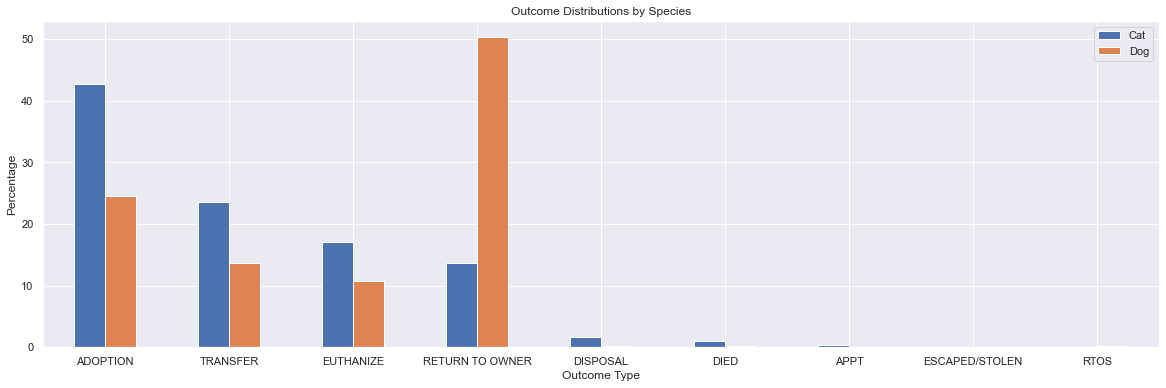

In [55]:
outcomes = pd.concat([cat_outcomes.rename("Cat"), dog_outcomes.rename("Dog")], axis=1)
ax = outcomes.plot.bar(rot=0,figsize=(20, 6), title="Outcome Distributions by Species")
ax.set(ylabel="Percentage", xlabel="Outcome Type")
plt.show()

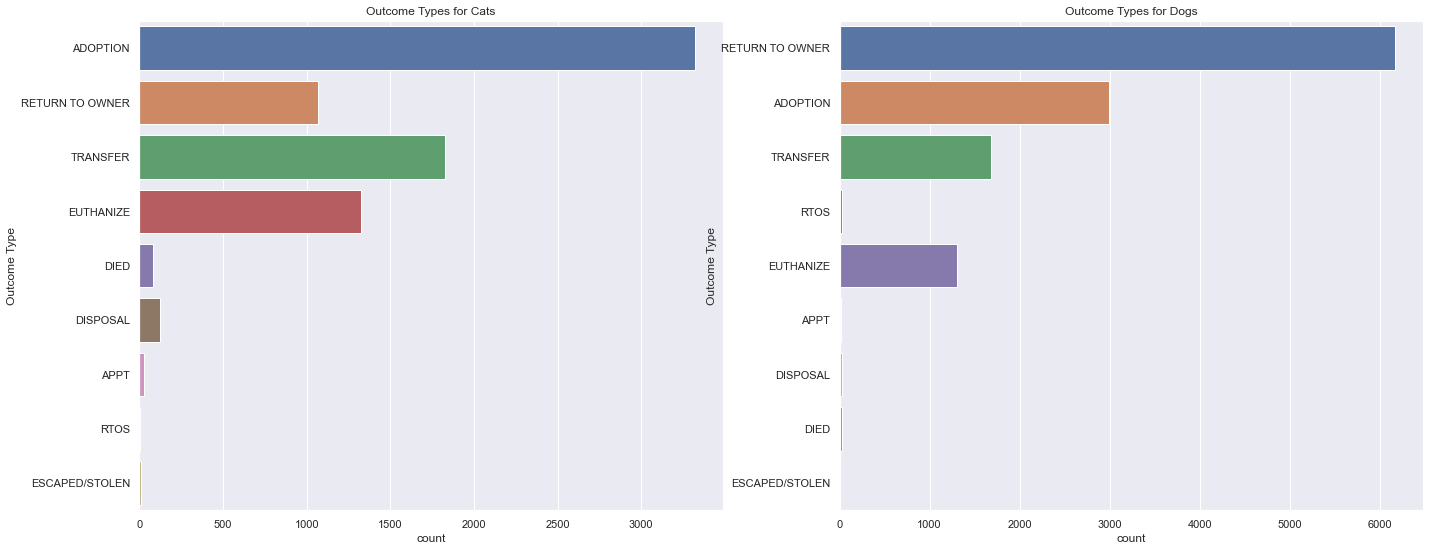

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
sns.countplot(y=cats["Outcome Type"], ax = ax1).set_title("Outcome Types for Cats")
sns.countplot(y=dogs["Outcome Type"], ax = ax2).set_title("Outcome Types for Dogs")
plt.show()

Evidently, cats and dogs have different outcome distributions. The majority of dogs are returned to their owners, adopted, or transfered. We see that dogs are often returned to their owners, adopted, or transfered to another shelter. In total dogs generally see a higher percentage of "positive outcomes" at 74.9%. Still, about 1 in 10 dogs in these shelters are euthanized or do not survive the shelter in general.

When compared to dogs, cats enjoy a significantly larger likelihood of adoption. 42.7% of shelter cats are adopted. Unfortunately, cats also see a greater rate of negative outcomes. 17% of cats are euthanized, with a total of 19.6% of felines not surviving their stay at the shelter.

### Understanding Intake and Outcome Frequency Over Time

Studies conducted on animal shelters on the East Coast found that there was typically a decrease in intake throughout the pandemic. Therefore, as animals continue to be adopted we there would be a corresponding decrease in the frequency of outcomes. In order to account for the overall decrease in shelter animals, our analysis focuses on how the distribution of outcomes changes. 

These trends, however, are still important to visualize as they may provide insight into the overall popularity of shelters across seasons. Such trends could be more valuable to analyze at a later date once the pandemic is over.

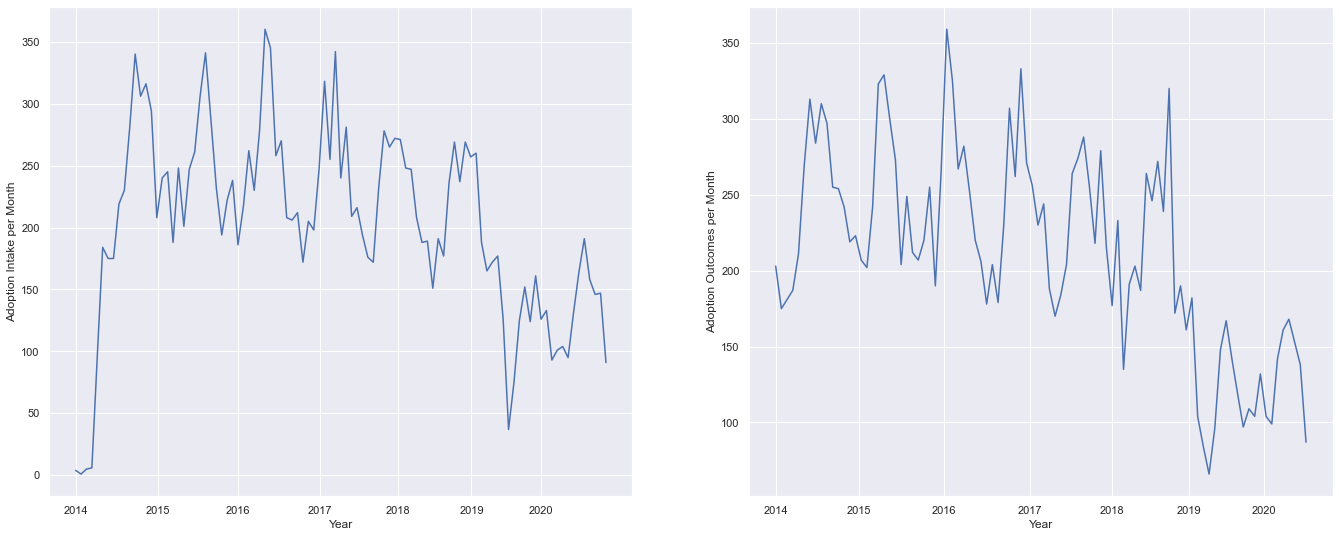

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
util.plot_by_month(shelter_data, "Intake Date", "Year", "Adoption Intake per Month", ax1)
util.plot_by_month(shelter_data, "Outcome Date", "Year", "Adoption Outcomes per Month", ax2)
plt.show()

Overall, the number of intakes and outcomes at these shelters have decreased greatly since the onset of the pandemic. Interestingly, we see that the number of both intakes and outcomes within each year is dependent on the time of year. With a wide variance in the number of outcomes per month, it seems that the beginning of year sees a significant spike in outcomes in comparison to other months. This effect looks as though it was delayed in 2019 around the onset of lockdowns, but reappeared in data for the year 2020.


#### Intake and Outcome Frequency for Cats

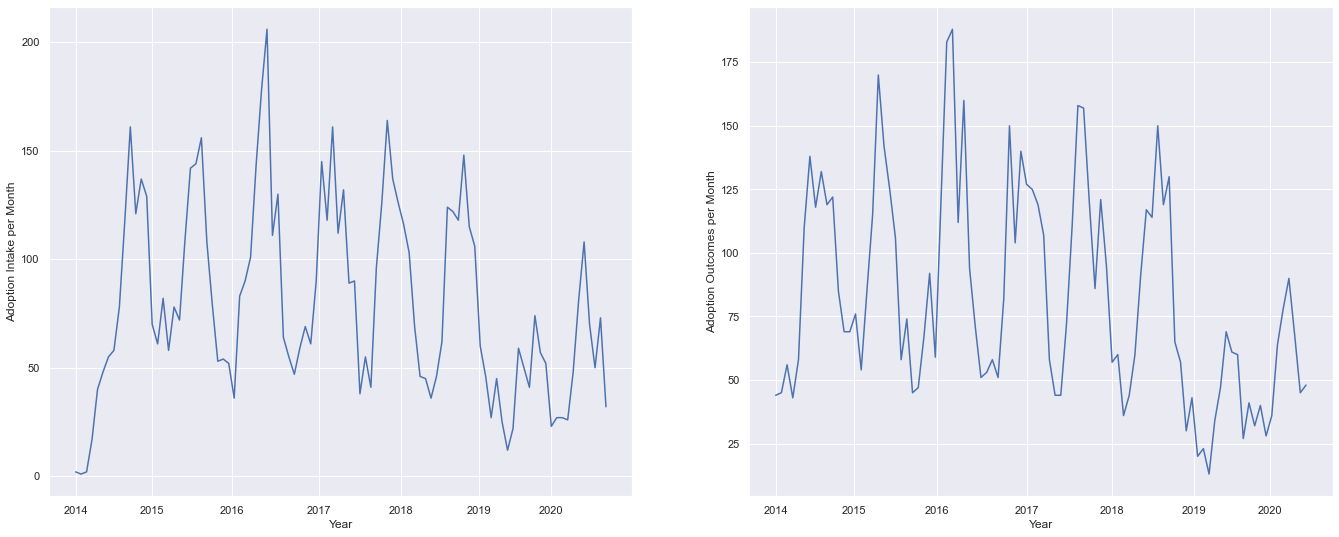

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
util.plot_by_month(cats, "Intake Date", "Year", "Adoption Intake per Month", ax1)
util.plot_by_month(cats, "Outcome Date", "Year", "Adoption Outcomes per Month", ax2)
plt.show()

Cats seem to see a general increase in outcomes during the middle of the year, including in 2019.

#### Intake and Outcome Frequency for Dogs

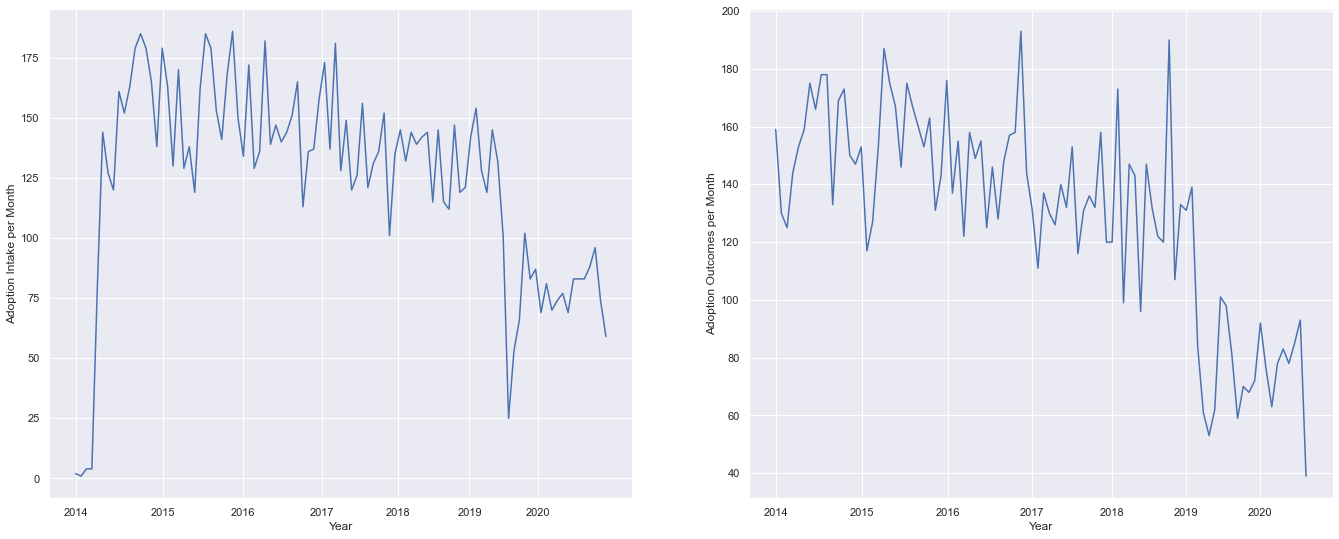

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
util.plot_by_month(dogs, "Intake Date", "Year", "Adoption Intake per Month", ax1)
util.plot_by_month(dogs, "Outcome Date", "Year", "Adoption Outcomes per Month", ax2)
plt.show()

Notably for dogs, we see a significant dip in outcomes for dogs post-covid, but with an large bump in outcomes towards the middle of 2019.

#### Positive vs. Negative Outcome Frequency for Cats Over Time

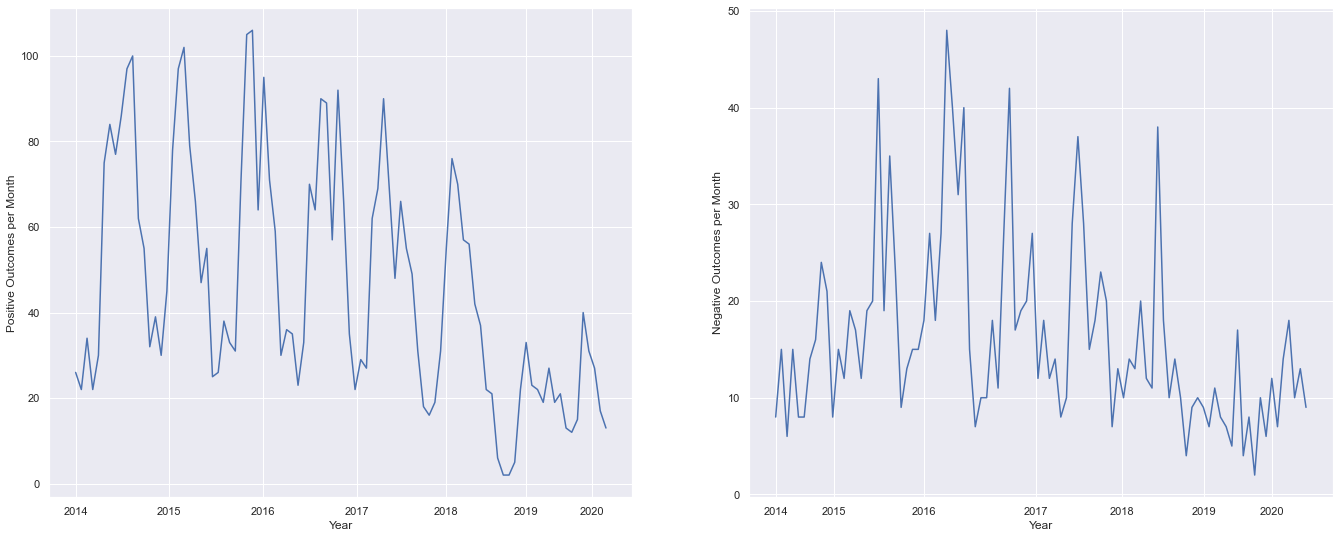

In [60]:
positive_cats = cats[cats["Outcome Type"].isin(["ADOPTION", "RETURN TO OWNER"])]
negative_cats = cats[cats["Outcome Type"].isin(["EUTHANIZE", "DISPOSAL", "DIED", "ESCAPED/STOLEN"])]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
util.plot_by_month(positive_cats, "Outcome Date", "Year", "Positive Outcomes per Month", ax1)
util.plot_by_month(negative_cats, "Outcome Date", "Year", "Negative Outcomes per Month", ax2)
plt.show()

For cats we see that the general trends of positive outcomes per month seems to have continued on a lesser scale during the pandemic. Importantly, the number of negative outcomes per month seems to have dropped significantly during lockdown. However, spikes in negative outcomes in mid-2019, and the continued rise in negative outcomes is concerning. However, it seems to reflect the recovery in number of intakes.

#### Positive vs. Negative Outcome Frequency for Dogs Over Time

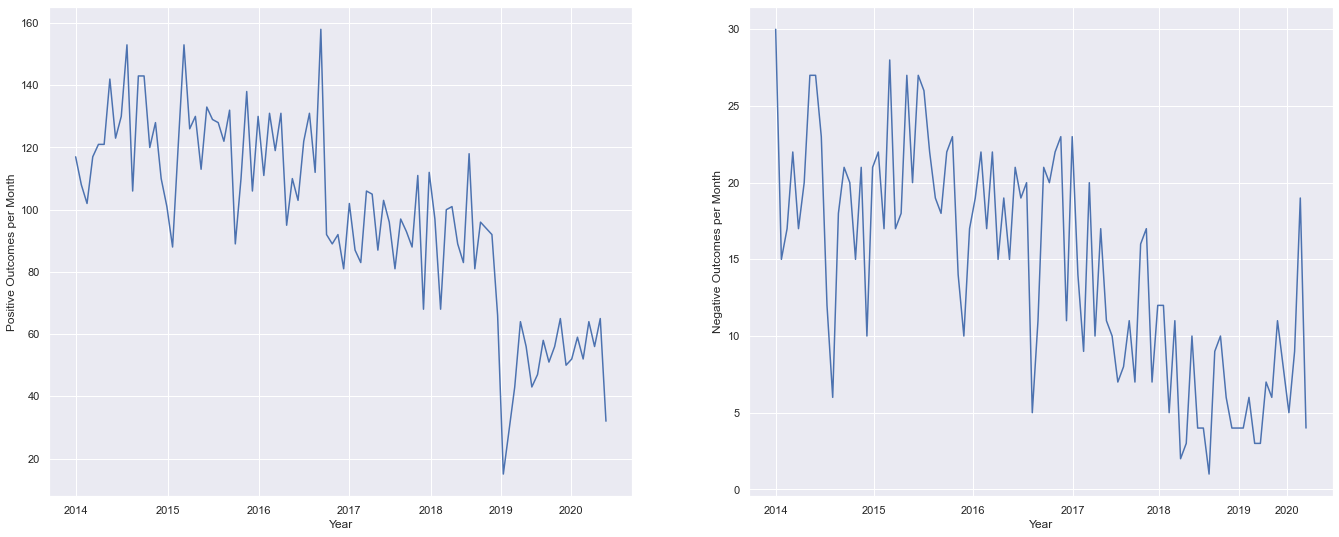

In [61]:
positive_dogs = dogs[dogs["Outcome Type"].isin(["ADOPTION", "RETURN TO OWNER"])]
negative_dogs = dogs[dogs["Outcome Type"].isin(["EUTHANIZE", "DISPOSAL", "DIED", "ESCAPED/STOLEN"])]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(23,9))
util.plot_by_month(positive_dogs, "Outcome Date", "Year", "Positive Outcomes per Month", ax1)
util.plot_by_month(negative_dogs, "Outcome Date", "Year", "Negative Outcomes per Month", ax2)
plt.show()

Unfortunately, dogs seem to a drastic spike in the number of negative outcomes after the year 2020. This may reflect the increase in intake seen at the end of 2019 (in an above graph), but a return to a nearly pre-pandemic rate is concerning given that the intake did not see such levels of recovery. Other sad findings include the immense drop in positive outcomes at the beginning of 2019, though it appears as though the onset of lockdown alleviated this. Also of concern is the drop in positive outcomes towards the tail end of the data.

### Understanding How Age Might Play a Role in Adoption Outcomes

#### Age Distribution of Cats Before and After COVID

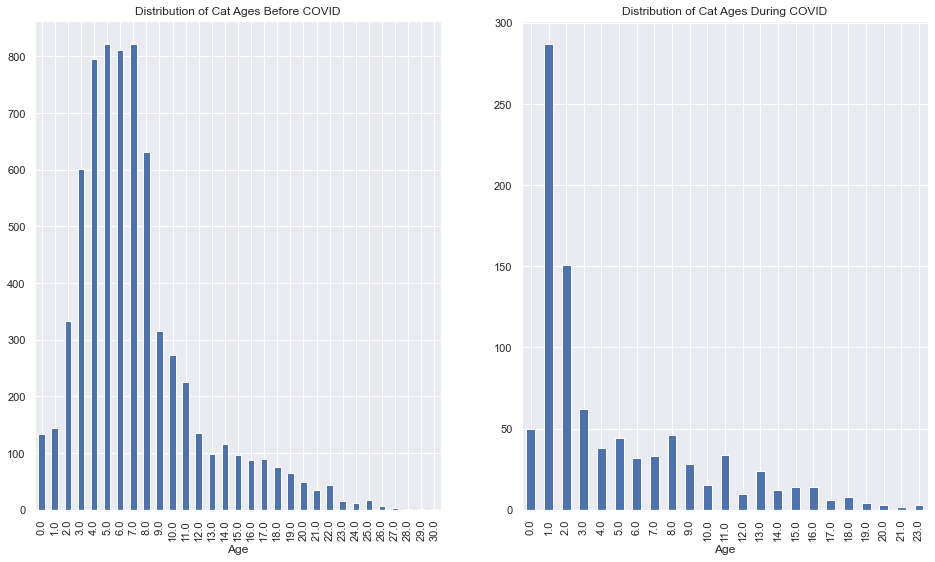

In [62]:
cats_before = cats[cats["Outcome After COVID"] == False]
cats_after = cats[cats["Outcome After COVID"] == True]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
cats_before.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
cats_after.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Cat Ages Before COVID")
ax2.set(title="Distribution of Cat Ages During COVID")
plt.show()

Both before and after COVID, we see that the majority of cats are young. Interestingly, there is a significant increase in 1-year old cats after COVID.

#### Age Distribution of Dogs Before and After COVID

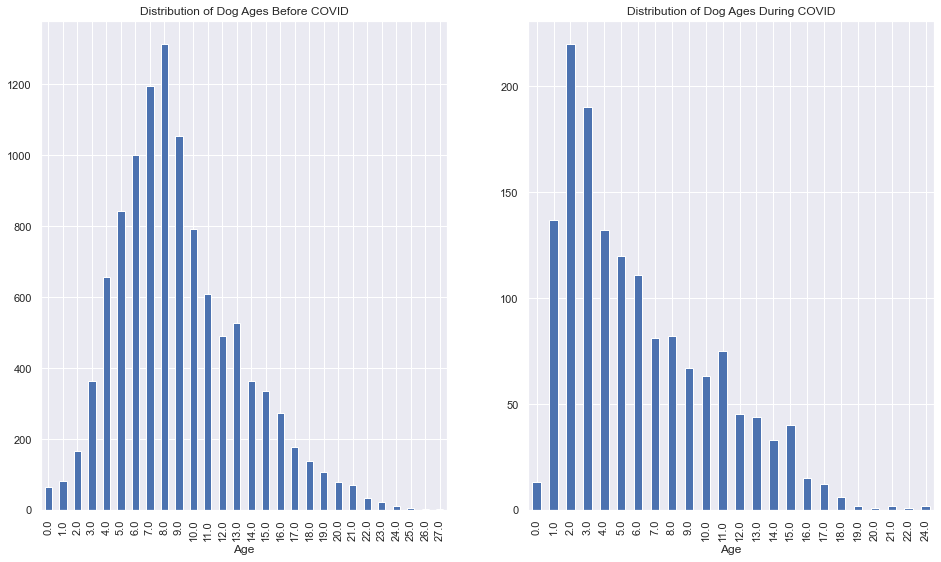

In [63]:
dogs_before = dogs[dogs["Outcome After COVID"] == False]
dogs_after = dogs[dogs["Outcome After COVID"] == True]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
dogs_before.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
dogs_after.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Dog Ages Before COVID")
ax2.set(title="Distribution of Dog Ages During COVID")
plt.show()

Dogs entering Sonoma County shelters before COVID were typically middle-aged, while the age of dogs entering the shelters after lockdown seemed to skew right.

#### Age Distribution of Positive Cat Outcomes Before and After Lockdown

In [64]:
pre_covid_pos_cats = positive_cats[positive_cats["Outcome After COVID"] == False]
during_covid_pos_cats = positive_cats[positive_cats["Outcome After COVID"] == True]

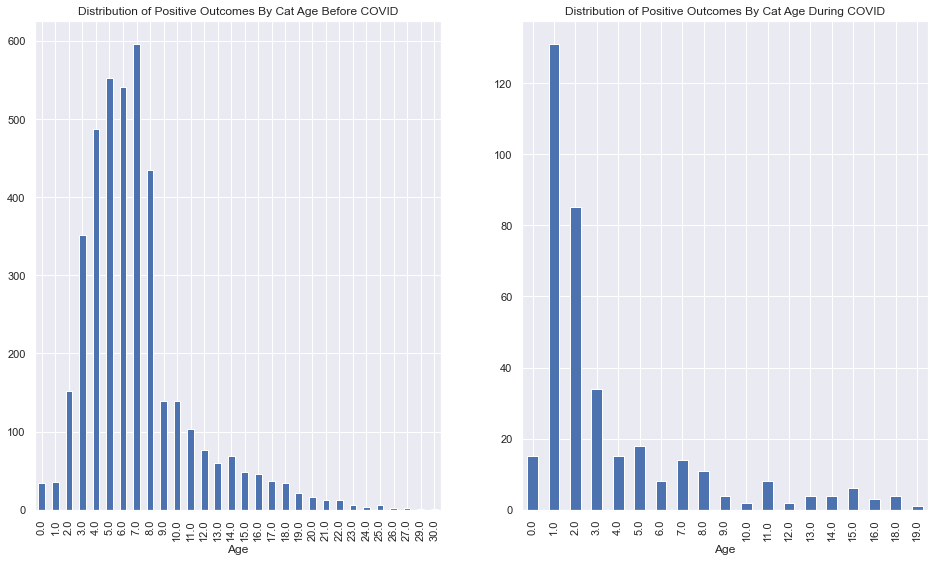

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
pre_covid_pos_cats.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
during_covid_pos_cats.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Positive Outcomes By Cat Age Before COVID")
ax2.set(title="Distribution of Positive Outcomes By Cat Age During COVID")
plt.show()

In general, we see that the majority of cats seeing positive outcomes are younger. Interestingly, the cats seeing positive outcomes during COVID are generally younger, with the majority being age one or two. Still, in both cases the distribution is right skewed.

In [66]:
pre_covid_neg_cats = negative_cats[negative_cats["Outcome After COVID"] == False]
during_covid_neg_cats = negative_cats[negative_cats["Outcome After COVID"] == True]

#### Age Distribution of Negative Cat Outcomes Before and After Lockdown

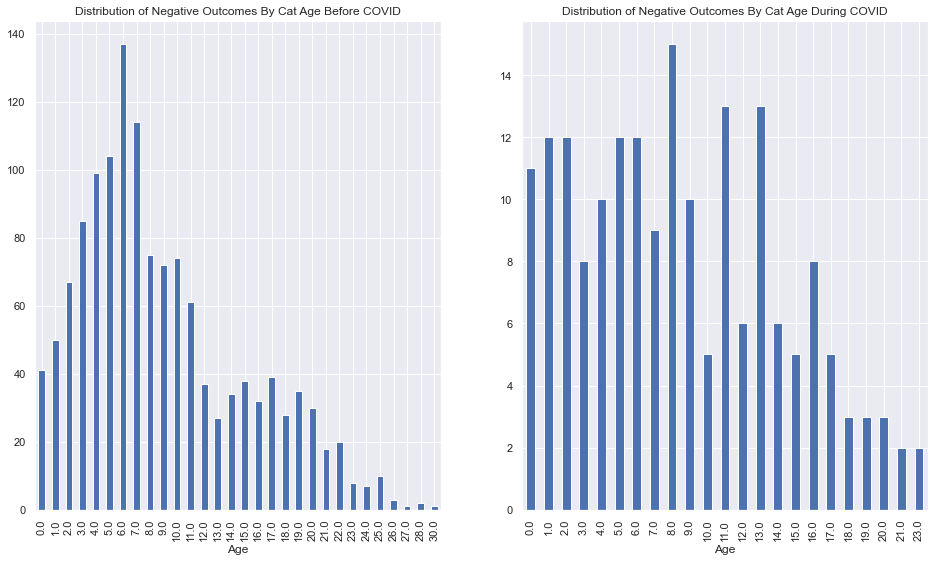

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
pre_covid_neg_cats.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
during_covid_neg_cats.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Negative Outcomes By Cat Age Before COVID")
ax2.set(title="Distribution of Negative Outcomes By Cat Age During COVID")
plt.show()

For cats before COVID, we see that cats of middle-age make up a greater number of negative outcomes. After COVID, we see that cats of all ages tend to see negative outcomes. Notably, the distribution doesn't seem to follow the distribution of ages of cats post-COVID. This may indicate that older cats were more likely to see a negative outcome after COVID.

#### Age Distribution of Positive Dog Outcomes Before and After Lockdown

In [68]:
pre_covid_pos_dogs = positive_dogs[positive_dogs["Outcome After COVID"] == False]
during_covid_pos_dogs = positive_dogs[positive_dogs["Outcome After COVID"] == True]

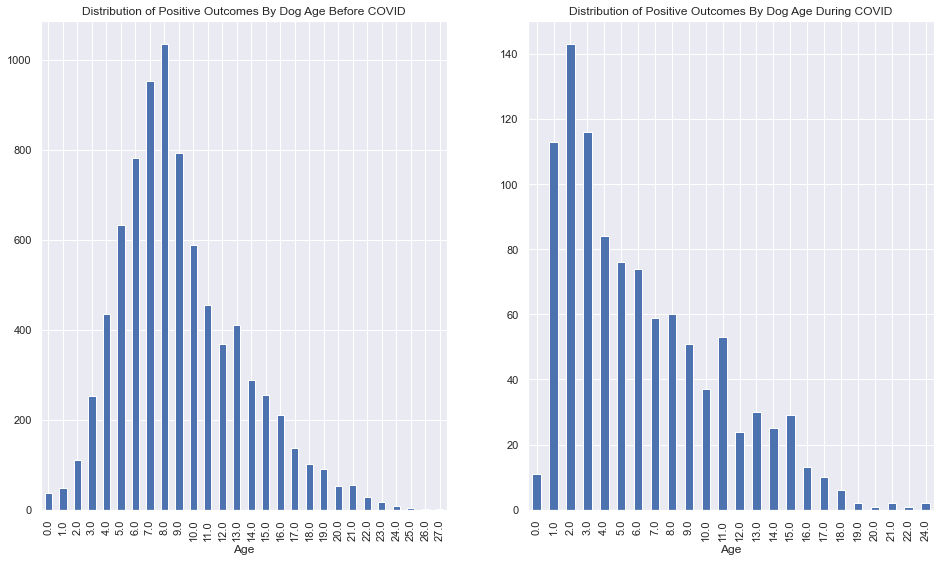

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
pre_covid_pos_dogs.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
during_covid_pos_dogs.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Positive Outcomes By Dog Age Before COVID")
ax2.set(title="Distribution of Positive Outcomes By Dog Age During COVID")
plt.show()

For dogs, the ages of dogs seeing positive outcomes nearly reflects the overall distribution of dog ages across the dataset. We see a large number of middle-aged dogs still seeing positive outcomes. After lockdown, however, it appears that the number of positive outcomes does decrease with age.

#### Age Distribution of Negative Dog Outcomes Before and After Lockdown

In [70]:
pre_covid_neg_dogs = negative_dogs[negative_dogs["Outcome After COVID"] == False]
during_covid_neg_dogs = negative_dogs[negative_dogs["Outcome After COVID"] == True]

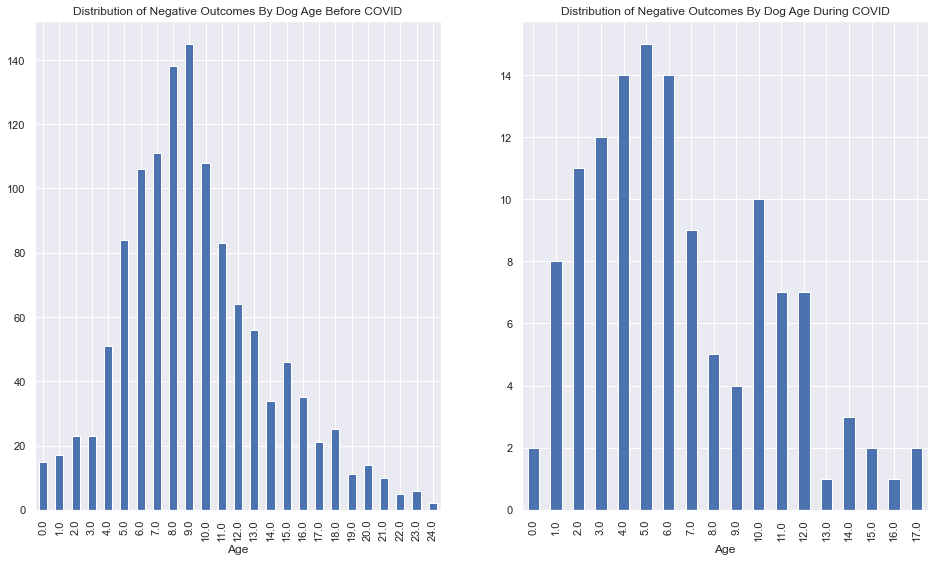

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False,figsize=(16,9))
pre_covid_neg_dogs.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax1)
during_covid_neg_dogs.groupby("Age")["Outcome Type"].count().plot(kind="bar", ax=ax2)
ax1.set(title="Distribution of Negative Outcomes By Dog Age Before COVID")
ax2.set(title="Distribution of Negative Outcomes By Dog Age During COVID")
plt.show()

Still, we see that the distribution of negative outcomes before lockdowns seems to mirror the overall distribution of ages. Moreover, the distribution of negative outcomes by age post-COVID appear to more closely follow to overall distribution of dog ages post-COVID, although older dogs do seem to see an increase in negative outcomes.

### Understanding Duration of an Animal's Shelter Stay

The *Outcome Date* indicates that the animal had an outcome type. As such, this provides details to help us relate the outcome type to the time periods of COVID-19. Along with *Outcome Date* and *Outcome Type*, we will also look at *Days in Shelter* (how long the animal has stayed in the shelter). "Days in Shelter" is one way to gauge how the animal's stay at the shelter aligns with the COVID-19 time period that we established. 

Let's now take a look at the top ten animals that had the longest stay in shelters. This is worth looking into because we want to see if there is a relationship between Outcome Type and how long long the animal stayed in the shelter.

#### Finding the Outcome Types of the Top 10 Dogs and Cats by Stay Duration

In [72]:
# Top 10 dogs who have the longest stay at the shelter 
dogDaysInShelter = dogs.sort_values(by='Days in Shelter', ascending=False)
dog_top10_longest = dogDaysInShelter[:10]
dog_top10_longest['Days in Shelter']
dog_top10_longest['Days in Shelter']

# compiling top 10 days in shelter dogs data
dogs_longest = dog_top10_longest['Days in Shelter']
dogs_longest_outcomeType = dog_top10_longest['Outcome Type']
dogs_longest_outcomeDate = dog_top10_longest['Outcome Date']
dogs_longest_breed = dog_top10_longest['Breed']
dogs_longest_name = dog_top10_longest['Name']


# isolating the date and putting to dataframe 
dogs_df_longest_outcome = dogs_longest.rename_axis('unique_values').to_frame('Days in Shelter')
dogs_df_longest_outcome['Outcome Type'] = dogs_longest_outcomeType.to_frame('Outcome Type')
dogs_df_longest_outcome['Outcome Date'] = dogs_longest_outcomeDate.to_frame('Outcome Date')
dogs_df_longest_outcome['Breed'] = dogs_longest_breed.to_frame('Breed')
dogs_df_longest_outcome['Name'] = dogs_longest_name.to_frame('Name')

first_column = dogs_df_longest_outcome.pop('Name')
second_column = dogs_df_longest_outcome.pop('Breed')

dogs_df_longest_outcome.insert(0, 'Name', first_column)
dogs_df_longest_outcome.insert(1, 'Breed', second_column)

dogs_df_longest_outcome

,Name,Breed,Days in Shelter,Outcome Type,Outcome Date
unique_values,,,,,
725,CHARLIE,GOLDEN RETR,1239,DISPOSAL,2021-09-27
8488,ZIGZAG,DACHSHUND,891,TRANSFER,2020-04-02
6659,PEARL,DACHSHUND,891,TRANSFER,2020-04-02
11644,PEANUTS,DACHSHUND,865,ADOPTION,2020-03-07
18485,MOXIE,BORDER COLLIE,823,ADOPTION,2020-05-13
15803,QUIX,CATAHOULA/MIX,793,TRANSFER,2020-04-13
3753,SADIE,GERM SHEPHERD/MIX,791,ADOPTION,2016-08-11
9905,LOGAN,LABRADOR RETR/MIX,788,ADOPTION,2016-10-29
2270,MOLI,BORDER COLLIE,766,ADOPTION,2020-03-17


It looks like, thankfully, most of these dogs that were in the shelter for insane amounts of time were adopted. Let's now do the same for cats.

In [73]:
# Top 10 cats who have the longest stay at the shelter 
catDaysInShelter = cats.sort_values(by='Days in Shelter', ascending=False)
cat_top10_longest = catDaysInShelter[:10]
cat_top10_longest.iloc[0]

cat_top10_longest['Days in Shelter']

# compiling top 10 days in shelter cats data
cats_longest = cat_top10_longest['Days in Shelter']
cats_longest_outcomeType = cat_top10_longest['Outcome Type']
cats_longest_outcomeDate = cat_top10_longest['Outcome Date']
cats_longest_breed = cat_top10_longest['Breed']
cats_longest_name = cat_top10_longest['Name']

# isolating the date and putting to dataframe 
cats_df_longest_outcome = cats_longest.rename_axis('unique_values').to_frame('Days in Shelter')
cats_df_longest_outcome['Outcome Type'] = cats_longest_outcomeType.to_frame('Outcome Type')
cats_df_longest_outcome['Outcome Date'] = cats_longest_outcomeDate.to_frame('Outcome Date')
cats_df_longest_outcome['Breed'] = cats_longest_breed.to_frame('Breed')
cats_df_longest_outcome['Name'] = cats_longest_name.to_frame('Name')


cat_first_column = cats_df_longest_outcome.pop('Name')
cat_second_column = cats_df_longest_outcome.pop('Breed')
cats_df_longest_outcome.insert(0, 'Name', cat_first_column)
cats_df_longest_outcome.insert(1, 'Breed', cat_second_column)
cats_df_longest_outcome

,Name,Breed,Days in Shelter,Outcome Type,Outcome Date
unique_values,,,,,
20924,ELIZABETH,DOMESTIC SH,747,ADOPTION,2018-09-22
15442,MISHA,DOMESTIC SH,353,ADOPTION,2015-06-27
2772,JOSH THE CAT,DOMESTIC SH,318,ADOPTION,2015-01-13
1710,NaN,DOMESTIC SH,281,DIED,2021-07-07
15235,SWEET RHONA,DOMESTIC SH,258,ADOPTION,2015-11-10
4203,SARAH,DOMESTIC SH,191,TRANSFER,2014-06-09
18946,NALA,DOMESTIC SH,189,ADOPTION,2014-03-01
21076,PHILLIP,DOMESTIC SH/MIX,189,ADOPTION,2017-02-16
12405,LOVELY,DOMESTIC SH,188,ADOPTION,2018-05-22


We see the same majority of positive outcome types (Adoption) in top 10 days in shelter for cats!

Even though it's interesting to look at the outcome types for these outlying animals, let's take a more in-depth look at how Days in Shelter reflects Outcome Type for dogs and cats. For each Outcome Type, we will look at the median Days in Shelter for dogs and cats. We are using the median days in shelter for each outcome type since it is less sensitive to outlier days in shelter (some of which we have seen above).

Type,CAT,DOG
Outcome Type,,
ADOPTION,21.0,22.0
APPT,5.0,2.0
DIED,3.0,7.0
DISPOSAL,1.0,2.5
ESCAPED/STOLEN,0.0,0.0
EUTHANIZE,2.0,17.0
RETURN TO OWNER,4.0,1.0
RTOS,2.0,8.0
TRANSFER,3.0,22.0


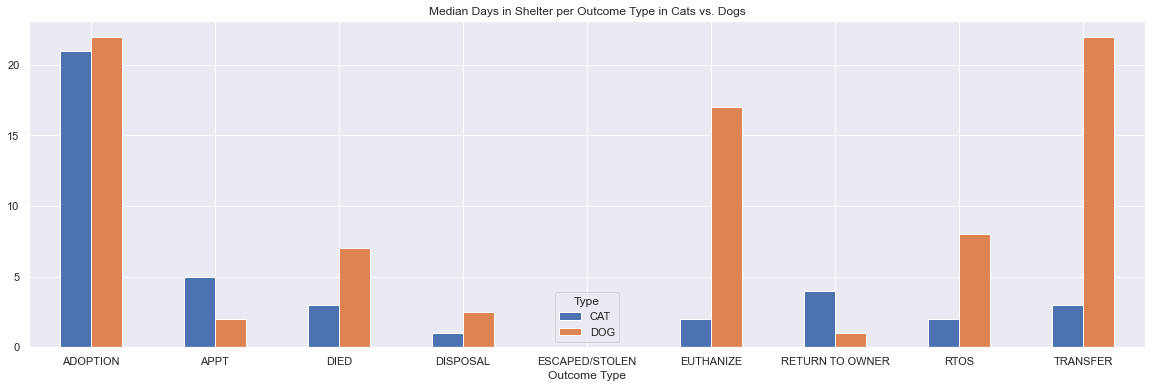

In [74]:
days_pt = pd.pivot_table(data = shelter_data, index = "Outcome Type", columns = "Type", values = "Days in Shelter", aggfunc = "median")
display(days_pt)
days_pt.plot(kind = 'bar', rot = 0, figsize = (20, 6), title = "Median Days in Shelter per Outcome Type in Cats vs. Dogs")
plt.show()

We can see that  cats are in shelters for much less time for negative outcome types. In fact, the median amount of days for euthanized cats is only 2 days! For dogs, it is much higher at 17 days. Unfortunately, It is also much lower for cats with the "Died" and "Disposal" outcome types. For neutral outcome types, days in shelter for cats is also significantly lower than it is for dogs. For days in shelter before being adopted, both animals have a median days in shelter of about 20 days. 

### Visualizing Outcome Types Before/After COVID-19

Let's now look from a distance at the subject of our project's question. We'll be taking a look at how each Outcome Type has changed from Before Lockdown to After Lockdown for cats and dogs. We'll use the proportions for each Outcome Type, since we have much more data Before Lockdown (longer time period).

First, we will look at how Outcome Types have changed speciically for dogs before and after lockdown.

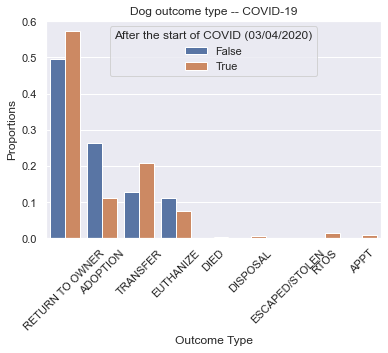

In [93]:
#start by looking at Outcome Type Before Lockdown vs. After Lockdown for dogs

#FALSE = before lockdown: earliest date - march 3, 2020 
#TRUE = after lockdown: march 4, 2020 - latest date

dogs_filtered_period = dogs.assign(**{"After the start of COVID (03/04/2020)": dogs.loc[:,'Outcome Date'].ge(
    pd.to_datetime('March 4, 2020'))})
beforeafter_dogs = dogs_filtered_period.groupby("After the start of COVID (03/04/2020)")['Outcome Type'].value_counts(
    normalize=True).to_frame().rename(columns={'Outcome Type': 'Proportions'}).reset_index()
ax = sns.barplot(
    data=beforeafter_dogs,  
    x = 'Outcome Type', y = 'Proportions', hue = "After the start of COVID (03/04/2020)"
)    

ax.tick_params(axis='x', rotation=45)
ax.set_title("Dog outcome type -- COVID-19")
plt.show()

The plot shows that the adoption rate of dogs drops significantly after lockdown. This may be because people don't feel that they can afford to adopt a dog, with the financial investment it calls for. The plot also shows that Return to Owner proportions spike. After lockdown started, it is possible that some owners felt lonely and/or guilty after taking their dog into the shelter and decided to take them back in. Negative outcomes both increase and decrease, with euthanizations of dogs dropping quite a bit, and death rates staying about the same. Neutral outcomes like "Transfer" increased quite a lot (as we would expect with COVID changing the world in many ways). This could be due to certain shelters enforcing stricter occupational limits for animals, meaning more transfers to other shelters.

Let's now take a look at how outcome types change for cats before and after COVID-19 lockdown.

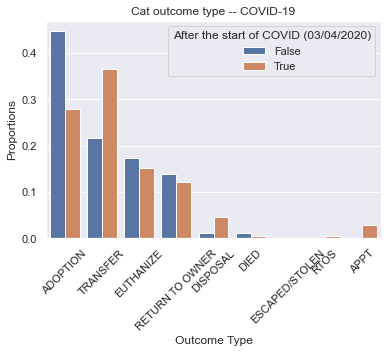

In [94]:
#start by looking at Outcome Type Before Lockdown vs. After Lockdown for cats

#FALSE = before lockdown: earliest date - march 3, 2020 
#TRUE = after lockdown: march 4, 2020 - latest date

cats_filtered_period = cats.assign(**{"After the start of COVID (03/04/2020)": cats.loc[:,'Outcome Date'].ge(
    pd.to_datetime('March 4, 2020'))})
beforeafter_cats = cats_filtered_period.groupby("After the start of COVID (03/04/2020)")['Outcome Type'].value_counts(
    normalize=True).to_frame().rename(columns={'Outcome Type': 'Proportions'}).reset_index()
ax = sns.barplot(
    data=beforeafter_cats,  
    x = 'Outcome Type', y = 'Proportions', hue = "After the start of COVID (03/04/2020)"
)    

ax.tick_params(axis='x', rotation=45)
ax.set_title("Cat outcome type -- COVID-19")
plt.show()

To our surprise, the changes in outcome types look very similar to what we saw for dogs. Similar to dogs, the proportion of adopted cats significantly declined after lockdown. Also, neutral outcomes increased significantly. We also see that euthanizations decreased. Deaths (non-euthanizations) flip-flopped, with "Died" decreasing and "Disposed" increasing.

#### Takeaway

Unfortunately, for both cats and dogs, adoption rates have decreased as a result of COVID-19 lockdown. Although we see a few positive outcomes that have increased, such as returned to owner increasing for dogs, we overall see decreases  in positive outcomes for both dogs and cats. Since we weigh adoptions as the most important outcome, our second hypothesis already seems unlikely. Regardless, we will still test whether "Adoption" and "Return to Owner" (both positive outcomes) show significant evidence of growth or decline in the hypothesis testing section.

## Hypothesis Testing

To test whether or not Outcome Types in shelters have significantly changed after the start of COVID-19 lockdown, we will conduct a permutation test on both dog and cat subsetted data. Since our outcome types are categorical data, the test statistic used will be the total variation distance (TVD). The util.permutation_test function below first calculates the observed TVD value by finding the summed absolute difference of all outcome types between the "Before Lockdown" and "After Lockdown" subsets of the data. Under the null hypothesis, if we were to permute either the "Outcome Type"s or "Outcome After COVID-19" columns, we would not see significant differences between the Outcome Types Before and After COVID after random shuffling. This is exactly what the function does next. For n trials, it permutes the "Outcome After COVID" column and calculates the TVD now with the shuffled column. After all trails, the amount of trial TVDs greater than or equal to the observed TVD are calculated and this amount is divided by the amount of trials. This generates the p-value, which will be compared with the significance level to determine whether or not the null hypothesis will be rejected. For the following tests, a significance level of 0.05 will be used.

We will start by permutation testing the Outcome Types for cats Before and After lockdown due to COVID-19. Our null hypothesis for this permutation test is that the outcome types for cats before lockdown and after lockdown are not significantly different. The alternate hypothesis is that the outcome types for cats before lockdown and after lockdown are significantly different. A significance level of 0.05 will be used for this test.

In [87]:
test_stats, obs = util.permutation_test(data = cats,
                      col="Outcome After COVID",
                      group_on = "Outcome Type",
                      test_stat = util.tvd,
                      chosen_axis = 1)

<AxesSubplot:ylabel='Frequency'>

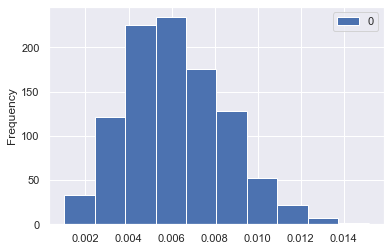

In [76]:
pd.DataFrame(test_stats).plot(kind="hist")

In [96]:
obs

0.047602531144669134

In [77]:
util.calc_pvalue(test_stats, obs)

0.0

With a p-value of approximately 0, we reject the null hypothesis. Therefore, it is extremely likely that the **Outcome Types for cats before and after COVID-19 lockdown are significantly different.**

We will now conduct the same permutation test for dogs in the dataset. Our null hypothesis for this permutation test is that the outcome types for dogs before lockdown and after lockdown are not significantly different. The alternate hypothesis is that the outcome types for dogs before lockdown and after lockdown are significantly different. A significance level of 0.05 will be used for this test.

In [78]:
test_stats, obs = util.permutation_test(data = dogs,
                      col="Outcome After COVID",
                      group_on = "Outcome Type",
                      test_stat = util.tvd,
                      chosen_axis = 1)

<AxesSubplot:ylabel='Frequency'>

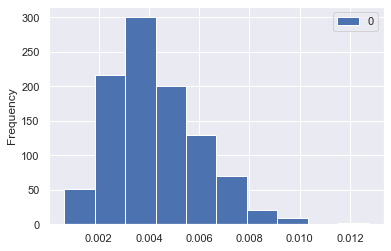

In [79]:
pd.DataFrame(test_stats).plot(kind="hist")

In [80]:
obs

0.04142551890387392

In [81]:
util.calc_pvalue(test_stats, obs)

0.0

Again we see a p-value of approximately 0. With this, we reject the null hypothesis. Therefore, it is extremely likely that the **Outcome Types for dogs before and after COVID-19 lockdown are significantly different.**

After noticing that the adoption rates and return to owner rates for cats and dogs from shelters in Sonoma county appear to change drastically after the onset of lockdown, we are interested to see if the difference in proportions for these single outcome types are significantly different individually. Since our Outcome Types are categorical, we will use a chi-square test to accomplish this. This test is important to separate from the above hypothesis test, since certain outcome types with large differences before/after COVID lockdown can cause significance difference amongst all outcome types as a collective. There are also small differences in outcome types that cause noise and can contribute to overall significance. In other words, this test will help isolate one outcome type to determine if it has changed drastically before/after COVID lockdown.

Before conducting a chi-square test, we need to verify that the assumptions are satisfied. These assumptions assert that the subsets are large enough to grant valid results. More specifically, these assumptions verify that each subset of data is greater than 5.

In [82]:
for animal in ["DOG", "CAT"]:
    for outcome in ["ADOPTION", "RETURN TO OWNER"]:
        assert shelter_data[(shelter_data["Type"] == animal) & (
            shelter_data["Outcome Type"] == outcome)].shape[0] >= 5

Since these assumptions are satisfied, we can now conduct the chi-square test. The util.chisq_boostrap function works by first randomly selecting n outcome types (250 by default), with the likelihood of each outcome type being selected based on its proportion in the outcome types for the specified animal (cat or dog). This is done for subsets of Before Lockdown and After Lockdown of that animal. Once this amount of samples is taken for each subset, the amount of the specified outcome type is determined. Since the chi-square test compares amounts between the two groups, we want to minimize as much noise as possible to focus on the differences between only the specified outcome type. In order to do this, our two groups of numbers being compared must only consist of the number of the specified outcome type and the number of all other outcome types for each animal. Once we compute these numbers for before and after, we can pass them into scipy's chisquare function to calculate our p-value. This whole process is conducted 1000 times by default. Once we have 1000 (or another input amount) p-values, the p-values themselves, a 95% confidence interval of the true p-value, and the median of all of the p-values are returned respectively in a tuple. A significance level of 0.05 will be used for these tests.

The described chi-square test will be conducted on the "Adoption" and "Return to Owner" outcome types for both dogs and cats. For each of the four tests, we will use the median p-value, since our p-values have high variance.

In [83]:
for animal in ["DOG", "CAT"]:
    for outcome in ["ADOPTION", "RETURN TO OWNER"]:
        print(animal + ", " + outcome + " p-value median: " + str(
            util.chisq_bootstrap(shelter_data, animal, outcome)[2]))

DOG, ADOPTION p-value median: 3.2011595616710047e-14
DOG, RETURN TO OWNER p-value median: 0.01017165885202151
CAT, ADOPTION p-value median: 4.463979308576632e-09
CAT, RETURN TO OWNER p-value median: 0.25913940273583247


Our test results give the following results:

For dog adoption rates, with a median p-value of approximately 0, we reject the null hypothesis. This means it is likely that the **adoption rate for dogs within shelters is significantly lower** after COVID lockdown than it was before.

For dog's return to owner rates, with a median p-value of approximately 0.014, we reject the null hypothesis. This means it is likely that the **return to owner rate for dogs within shelters is significantly higher** after COVID lockdown than it was before.

For cat adoption rates, with a median p-value of approximately 0, we reject the null hypothesis. This means it is likely that the **adoption rate for cats within shelters is significantly lower** after COVID lockdown than it was before.

For cat's return to owner rates, with a median p-value of approximately 0.24, we do not reject the null hypothesis. This means it is likely that the **return to owner rate for cats within shelters has not changed** after COVID lockdown.

# Ethics & Privacy

#### General Ethics and Privacy Concerns

It is important for our project to consider any potential ethical violations our project may make while analyzing animal adoption outcomes before and during the pandemic. For instance, there may be some ambiguity in the so-called “positivity” of an outcome—we have no way of knowing whether an adoption or return to owner was truly positive for the animal. Labels of positivity or negativity were collectively decided by us as a group, and therefore potentially influenced by our own biases and opinions. 

Additionally, the data available was procured from a database maintained by the Sonoma County government. This information is publicly available on their web page, which we acquired without cost following the California Consumer Privacy Act. It does not include any personally identifiable information about who adopted the pet, and therefore should not lead to any breaches of owner-privacy. Still, some columns of the data were omitted. These included unique identifiers of the pets, not including their names, and any numerical location data that might indicate the general residence of the animal. 


#### Generalization Concerns

The dataset we used concerns only adoptions from a single county within California: Sonoma County. This county is home to 494,336 individuals as of 2019. The animals present in these shelters may be reflective of their suitability to the surrounding area. The demographics of Sonoma County as of 2016 are:

https://sonomacounty.ca.gov/Health/Public-Reports/Summary-Measures-2015-17/Demographics-and-Social-Characteristics/

1. 65.6% White, with a median age of 50.8
2. 26.5% Hispanic/Latino, with a median age of 28.8
3. 4.9% Asian/Pacific Islander, with a median age of 40.3
4. 2.1% African American/Black, with a median age of 35.1
5. 0.9% American Indian/Alaska Native, with a median age of 41.8

It is unclear how the ethnicity or age of the owner may impact their preference for adoption, or their what role it may play in a shelter's determination if they are suitable foster homes for shelter animals. Still, these demographics may not mirror those of other areas in California.

Given that our data reflects the trends of a single county, other counties should be analyzed in order to form a general trend for California. Unforunately, many other counties within California do not make their shelter data as easily accessible.

#### Ethical Concerns Informing Omission of Data

The following are explanations of how particular features within the data may play a role in ethics.

1. The kennel number is understood as the current animal shelter where the animal is located. Although this data is often made publicly available to attract potential foster parents, we decided to omit it here. In cases where an individual is curious about a particular animal in our dataset, they may directly visit the Sonoma County website where they advertise shelter animals that their experts have clearly determined are ready to leave the shelter. The intent of removing this column is to limit the further spread of this information without informed consent from the dataset owner as a means of preventing any harmful practices that could occur to these animals, even if such an occurrence would be highly unlikely. 

2. When determining “Intake Condition”, the data does not specifically identify any particular health issues that an animal may have. Ultimately, these may factor into an animal’s suitability for adoption by means not accurately tracked by the data we have available. For example, shelter animals with expensive medical needs may be less likely to see a positive outcome. Therefore, we elected not to directly study the impact of health on outcome.

3. Other identifying information, such as specific animal IDs or Date of Birth were removed to preserve some level of anonymity for the animals, as these would be unique identifiers with precision that goes beyond name. 

In this project, we are only considering information regarding cats and dogs, given their widespread popularity as pets. With the limited data available are unable to ascertain if these findings would hold true for other common shelter animals, such as bunnies. 

#### Transparency of Findings

To keep our report concise, much of the analysis performed was aided by a custom python script created by our project team. For the sake of reproducibility of our analysis we are providing a link to the script, util.py, below.
The code can be found within the project google drive folder: https://drive.google.com/drive/folders/10N2j4wcvfY-m79s2l7TFP5hUVx5nLxXE?usp=sharing

# Conclusion & Discussion

#### Conclusion

We started our project by searching for data that could be relevant to answering the question: did COVID associated lockdowns have an impact on adoption outcomes for shelter animals in California? To do so, we utilized data from the Sonoma County Department of Health Services, allowing us to perform analysis on adoption trends for a single county within the state. Fortunately, this data included an abundance of relevant features to answering our questions, such as adoption outcome types, intake types, and the age of the animal. However, as mentioned previously our findings are limited to this single county. In the future, to test generalizability of our findings, similar analysis following the procedures described in our report can be done on data within other counties in California, or combinations of counties should the data become available. 
In doing our analysis, we hypothesized that COVID would have a significant change in the distribution of outcome types for the shelters overall, and specifically that the data would support an increase in self-labeled “positive” outcomes, contradicting research findings on the East Coast. However, we expected our exploratory analysis to conform with the general trends found in research studies, such as the overall decrease in intake amount. Our analysis was able to visualize trends in outcome types for both cats and dogs, showing that the two shelter animal species seemed to display different adoption outcomes. Furthermore, each species was impacted by COVID separately, with notable differences in positive and negative outcomes overall, and by age of the animal. 
To specifically hypothesis test our main hypothesis, a permutation was performed using total variation distance in outcome proportion as a test statistic. All hypothesis tests were conducted with a significance level pre-determined as 5%. By permuting the designation of before or after lockdown, defined as March 4th, 2020, we were able to simulate under a null hypothesis that stated that the distributions of outcomes had not significantly shifted post-lockdown. Testing showed that with a p-value of approximately 0.0, there was insufficient support for the null hypothesis, and that the distribution adoption outcomes were likely significantly different during the COVID-era. 
Additionally, chi-squared tests were run on specific positive adoption outcomes, such as “adoption” or “return to owner” to see if was a significant different in their proportions before and after lockdown. To control for the variability in number of overall adoptions, this was done by repeatedly sampling subsets of 250 animals both before and after COVID to compare the frequency of a desired outcome from before to after using a one-way chi-squared. This was done 1000 times, and generated a median p-value, and a 95% confidence interval for that p-value. Testing showed that for “adoptions” specifically showed a significant decrease for both dogs and cats. For “return to owner”, there was an increase for dogs, but no significant change for cats.

#### Discussion

Our hypothesis testing was primarily concerned with answering if there were overall changes in the proportions of shelter animal outcomes when comparing before and post-COVID era shelter data. In doing exploratory analysis to serve our questions, we noticed fascinating trends that could be the subject of future analysis. For example, the ages of both cats and dogs seeing outcomes in Sonoma County post-lockdown seemed generally lower in comparison to before-lockdown. The impacts of age specifically on an animal’s suitability for adoption or why the ages of animals tended to decrease is unknown. Additionally of interest would be the “Intake Condition” of an animal. These factors may all be influenced by the lower levels of intakes for these shelters, which agreed with findings in previous COVID-related animal shelter studies. Therefore, a sister-analysis on the changes of intake post-lockdown would be recommended. We neglected to study the overall impact of health concerns on an animal’s adoptability, though it is entirely plausible that the distribution of outcomes can be linked to the distribution or number of healthy animals that a shelter deems healthy enough for a foster home. Finally, as previously mentioned, this analysis can and should be conducted on data made available by other counties within California as a means of truly generalizing a trend for the state, as it is not immediately clear if our data would generalize to other counties.

# Team Contributions

- Alec:

Alec contributed in part to all sections requiring data analysis. His work can be seen specifically in the imputation and hypothesis testing portions of the project. Alec also was responsible for some of the code found in util.py. He also contributed to the video presentation and accompanying powerpoint.

- Tyler

Tyler served as the lead on the project. His work can be seen in the data cleaning, missingness analysis, exploratory data analysis, and hypothesis testing. Tyler was also responsible for editing the majority of the report, and created a large amount of the code in util.py, a python file built to handle the majority of analysis and some plot generation.

- Sophia

Sophia's work can be mostly found in the exploratory data analysis. In addition to providing code, Sophia helped inform some of the decisions made to find key relationships between variables. She also participated in data cleaning, and worked on the video presentation and accompanying powerpoint.

- Rodolfo

Rodolfo contributed in part to the exploratory data analysis and cleaning, helping Sophia and Tyler with both sections. He also served as the primary writer for the ethics and conclusion sections.

# Presentation Video:

Available in project google drive folder: https://drive.google.com/drive/folders/10N2j4wcvfY-m79s2l7TFP5hUVx5nLxXE?usp=sharing